### Week 10 : Day 1 - Maximum Likelihood Estimation

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate.[1] The logic of maximum likelihood is both intuitive and flexible, and as such the method has become a dominant means of statistical inference.[2][3][4]

If the likelihood function is differentiable, the derivative test for finding maxima can be applied. In some cases, the first-order conditions of the likelihood function can be solved analytically; for instance, the ordinary least squares estimator for a linear regression model maximizes the likelihood when all observed outcomes are assumed to have normal distributions with the same variance.[5]

From the perspective of Bayesian inference, MLE is generally equivalent to maximum a posteriori (MAP) estimation with uniform prior distributions (or a normal prior distribution with a standard deviation of infinity). In frequentist inference, MLE is a special case of an extremum estimator, with the objective function being the likelihood.

In simple terms it is a way of finding the best fit for your data.

Finding the highest maximum prediction

Introduction

In this post I’ll explain what the maximum likelihood method for

parameter estimation is and go through a simple example to

demonstrate the method. Some of the content requires knowledge

of fundamental probability concepts such as the definition of joint

probability and independence of events. I’ve written a blog post

with these prerequisites so feel free to read this if you think you

need a refresher.

What are parameters?

Often in machine learning we use a model to describe the process
that results in the data that are observed.

For example, we may use
a random forest model to classify whether customers may cancel a


subscription from a service (known as churn modelling) or we may

use a linear model to predict the revenue that will be generated for

a company depending on how much they may spend on
advertising (this would be an example of linear 

regression). Each model contains its own set of parameters that ultimately defines

what the model looks like.

For a linear model we can write this as y = mx + c. In this

example x could represent the advertising spend and y might be

the revenue generated. m and c are parameters for this model. 

Different values for these parameters will give different lines (see
figure below



Three linear models with different parameter values.



So parameters define a blueprint for the model. It is only when

specific values are chosen for the parameters that we get an

instantiation for the model that describes a given phenomenon.


Intuitive explanation of maximum likelihood
estimation


Maximum likelihood estimation is a method that determines

values for the parameters of a model. The parameter values are 

found such that they maximise the likelihood that the process

described by the model produced the data that were actually
observed.

The above definition may still sound a little cryptic so let’s go

through an example to help understand this.
Let’s suppose we have observed 10 data points from some process.

For example, each data point could represent the length of time in

seconds that it takes a student to answer a specific exam question.

These 10 data points are shown in the figure below

The 10 (hypothetical) data points that we have observed

We first have to decide which model we think best describes the

process of generating the data. This part is very important. 

At the
very least, we should have a good idea about which model to use.

This usually comes from having some domain expertise but we
wont discuss this here.

For these data we’ll assume that the data generation process can

be adequately described by a Gaussian (normal) distribution.

Visual inspection of the figure above suggests that a Gaussian
distribution is plausible because most of the 10 points are
clustered in the middle with few points scattered to the left and the
right. (Making this sort of decision on the fly with only 10 data
points is ill-advised but given that I generated these data points
we’ll go with it).

Recall that the Gaussian distribution has 2 parameters. The mean,
μ, and the standard deviation, σ. 

Different values of these
parameters result in different curves (just like with the straight
lines above). We want to know which curve was most likely


responsible for creating the data points that we observed? 

figure below). Maximum likelihood estimation is a method that

will find the values of μ and σ that result in the curve that best fits
the data

The 10 data points and possible Gaussian 

distributions from which the data were drawn. f1 is
normally distributed with mean 10 and variance 2.25 (variance is equal to the square of the

standard deviation), this is also denoted f1 ∼ N (10, 2.25). f2 ∼ N (10, 9), f3 ∼ N (10, 0.25) and
f4 ∼ N (8, 2.25). The goal of maximum likelihood is 

to find the parameter values that give the
distribution that maximise the probability of 

observing the data

The true distribution from which the data were generated was f1 ~

N(10, 2.25), which is the blue curve in the figure above

Calculating the Maximum Likelihood Estimates


Now that we have an intuitive understanding of what maximum
likelihood estimation is we can move on to learning how to

calculate the parameter values. The values that we find are called
the maximum likelihood estimates (MLE)

Again we’ll demonstrate this with an example.

Suppose we have
three data points this time and we assume that they have been

generated from a process that is adequately described by a

Gaussian distribution. These points are 9, 9.5 and 11. How do we

calculate the maximum likelihood estimates of the parameter

values of the Gaussian distribution μ and σ?

What we want to calculate is the total probability of observing all

of the data, i.e. the joint probability distribution of all observed

data points. To do this we would need to calculate some

conditional probabilities, which can get very difficult. So it is here

that we’ll make our first assumption. The assumption is that each

data point is generated independently of the others.

This
assumption makes the maths much easier. 

If the events (i.e. the
process that generates the data) are independent, then the total

probability of observing all of data is the product of observing each

data point individually (i.e. the product of the marginal
probabilities).

The probability density of observing a single data point x, that is

generated from a Gaussian distribution is given by

P(x;μ, σ) = 1 /σ √2π exp ( - (x -μ )2 / 2σ2

In [1]:
#E(X)=μ=∑xP(x).

The semi colon used in the notation P(x; μ, σ) is there to

emphasise that the symbols that appear after it are parameters of

the probability distribution. So it shouldn’t be confused with a

conditional probability (which is typically represented with a

vertical line e.g. P(A| B)).

In our example the total (joint) probability density of observing

the three data points is given by:

P(9, 9.5,11: μ, σ) =

1 / σ √2π exp(- (9 -  μ)2 /2σ^2) x  1 / σ√2π exp(9.5 -  μ)2 /2σ^2) 

x   1 / σ √2π exp((11- μ)2 / 2σ^2)
                                  

We just have to figure out the values of μ and σ that results in
giving the maximum value of the above expression.

If you’ve covered calculus in your maths classes then you’ll
probably be aware that there is a technique that can help us find

maxima (and minima) of functions. It’s called differentiation. 

All
we have to do is find the derivative of the function, set the

derivative function to zero and then rearrange the equation to

make the parameter of interest the subject of the equation.

And
voilà, we’ll have our MLE values for our parameters.

I’ll go
through these steps now but I’ll assume that the reader knows how

to perform differentiation on common functions. If you would like

a more detailed explanation then just let me know in the
comments.

What is differentiation in maths?

Differentiation is a method used to compute the rate of change of a function f(x) with respect to its input x . This rate of change is known as the derivative of f with respect to x .

##### The log likelihood


The above expression for the total probability is actually quite a

pain to differentiate, so it is almost always simplified by taking the

natural logarithm of the expression. This is absolutely fine because

the natural logarithm is a monotonically increasing function. 

This
means that if the value on the x-axis increases, the value on the yaxis 

also increases (see figure below). This is important because it

ensures that the maximum value of the log of the probability

occurs at the same point as the original probability function.

Therefore we can work with the simpler log-likelihood instead of 

the original likelihood.

Monotonic behaviour of the original function, y = x on the left and the (natural) logarithm

function y = ln(x). These functions are both monotonic because as you go from left to right on

the x-axis the y value always increases.

Example of a non-monotonic function because as you go from left to right on the graph the value

of f(x) goes up, then goes down and then goes back up again.

Taking logs of the original expression gives us

In P(x;μ, σ) =   In

(1 / σ √2π ) -  (9 - μ)2 /2σ^2  

+ In  (1 / σ√2π )- (9.5 - μ)2 /2σ^2)

+  In  (1 / σ √2π) - (11- μ)2 / 2σ^2)

This expression can be simplified again using the laws of

logarithms to obtain:

In P(x;μ, σ) = -3In (σ) - 3/2 In (2π ) - 1/2σ^2

[ (9 - μ)2  + (9.5 - μ)2

 + (11- μ)2 ]

This expression can be differentiated to find the maximum. 

In this
example we’ll find the MLE of the mean, μ. 

To do this we take the
partial derivative of the function with respect to μ, giving

a In P(x;μ, σ) / a ;μ  = 1/ σ2 [9 + 11 - 3μ].

Finally, setting the left hand side of the equation to zero and then

rearranging for μ gives:

μ = 9 + 9.5 + 11  / 3   = 9.833

And there we have our maximum likelihood estimate for μ. 

We can

do the same thing with σ too but I’ll leave that as an exercise for

the keen reader.


#### Concluding remarks


Can maximum likelihood estimation always be solved in an
exact manner?

No is the short answer. It’s more likely that in a real world

scenario the derivative of the log-likelihood function is still

analytically intractable (i.e. it’s way too hard/impossible to

differentiate the function by hand). Therefore, iterative methods

like Expectation-Maximization algorithms are used to find 

numerical solutions for the parameter estimates. The overall idea
is still the same though.

So why maximum likelihood and not maximum probability?

Well this is just statisticians being pedantic (but for good reason).

Most people tend to use probability and likelihood

interchangeably but statisticians and probability theorists

distinguish between the two. The reason for the confusion is best

highlighted by looking at the equation.

L(μ, σ; data) = P(data;(μ, σ)

These expressions are equal! So what does this mean?

Let’s first
define P(data; μ, σ)? It means “the probability density of
observing the data with model parameters μ and σ”.

It’s worth
noting that we can generalise this to any number of parameters
and any distribution.

On the other hand L(μ, σ; data) means “the likelihood of the
parameters μ and σ taking certain values given that we’ve
observed a bunch of data.”

The equation above says that the probability density of the data

given the parameters is equal to the likelihood of the parameters

given the data. But despite these two things being equal, the

likelihood and the probability density are fundamentally asking

different questions — one is asking about the data and the other is

asking about the parameter values. This is why the method is

called maximum likelihood and not maximum probability.

When is least squares minimisation the same as maximum
likelihood estimation?

Least squares minimisation is another common method for

estimating parameter values for a model in machine learning. 

It
turns out that when the model is assumed to be Gaussian as in the
examples above, 

the MLE estimates are equivalent to the least
squares method. For a more in-depth mathematical derivation
check out these slides.

Intuitively we can interpret the connection between the two
methods by understanding their objectives.

For least squares
parameter estimation we want to find the line that minimises the

total squared distance between the data points and the regression
line (see the figure below). In maximum likelihood estimation 
we
want to maximise the total probability of the data. 

When a
Gaussian distribution is assumed, the maximum probability is

found when the data points get closer to the mean value. Since the

Gaussian distribution is symmetric, this is equivalent to

minimising the distance between the data points and the mean
value

Regression line showing data points with random Gaussian noise

Check graph in the slides

### Maximum likelihood Estimation with Simple Example and Python

Maximum likelihood estimate is used to calculate the best way of fitting mathemathical model to some data

Example:
    
Suppose we have  a data 

i. Normal   ( you want to find μ, 6)

ii. Poison

ii. Binommial

Suppose you are interested in th average heights of college going students in a state.

You have a sample of some number(sample height) of the state but not the entire populations

And report their heights.

Furthermore, you are willing to assume that heights are normally distributed with some unknown mean and variance.

The sample mean is then maximum likelihood estimator of the population mean.

For a fixed set of data and underlying probability model, maximum 

likelihood picks the valuee of the model parameters that make the data 

more likely than any other values of the parameter would make them.

Given a statistical model (e.g, normal distribution) for the data , it 

is necessary to estimate the population parameter of the model

Suppose we have a normal distribution,and we have the mean and the satndard deviation

It is a point estimation approach to estimate the population pararmeter.

So we have to use this fomula: 
    
Likelihood(y | 0)  =

L(x|0) =  n / π i=1 1/ √ 2 π 6 e -(xi-μ )2/26^2
                    
Theta is the model parameter mu and sigma

Now , if you take log in both sides ,you will have

log L((x|0) = m Σ i=1 (2i-μ)2 / 2 6^2 -
      
      0.5m log2 π -mlog 6

We would like to estimate mu and sigma for the given data.

x  " μ,Σ "

We choose the different set of values  of the parameters mu and sigma that maximize the equation

We select various set of mu and sigma and check the set of mu and sigma this value matches with.

With the help of available data, xiΣ x 
                                i=1,2,..,m
    
We calculate x in log in given thema ie,
Log l(x|0)

For the set of mu  and sigma k ie 
   μk, Σk

k  E m 

for which log likelihood each given data is the maximum

For each maximum ,all the maximum likelihood is tuition for the population parameter.(mu and sigma)

We have these sample data taken from a population data

sample data
x 

x1

x2

x3
.

.

.

xm

Lets assume it is a normal distribution.

From the sample data , we want to calculate the population mean( μ) for the given x values

In this case ,it will be


μ1,  Σ1

μ2,  Σ2

μ3,  Σ3

.

.

.
μm,  Σm

Suppose for .

μk,  Σk = Log l(x|0)  is maximum value


Then select this as the population factor

μk,  Σk 

In statistics, σ represents the standard deviation of population or probability distribution (where mu or μ is used for the mean).

Lets take a simple example

Let x - 1, 2, 3, 4, 5

suppose we want to calculate what will be mu and sigma 

The maximum value is -4.731'

We can assume that fort the given dataset, the
population parameter will be 

mu = 3

sigma = 2

##### Maximum likelihood estimation

In [2]:
import numpy as np
import math

###### sample data

In [3]:
x = np.array([[ 1, 2, 3, 4, 5]]) 


In [4]:
n = np.shape(x)[1]

In [5]:
print("The sample data: \n", x)
print("The number of data present in x is: ", n)

The sample data: 
 [[1 2 3 4 5]]
The number of data present in x is:  5


In [6]:
mu = np.array([[ 1, 2, 3, 2, 3]])    # combinaton of mu and sigma values)
sigma = np.array([[ 1, 2, 2, 3, 3]])

In [7]:
print("\nThe mean is: " ,mu)
print("The st. dev is: ",sigma)


The mean is:  [[1 2 3 2 3]]
The st. dev is:  [[1 2 2 3 3]]


In [8]:
print("mu sigma logL")  #For each and every set we calculate the log
for i in range(5):
    logL = np.sum(np.square(x - mu[0,i]/(2*np.square[0,i]))) - (0.5*n*np.log10(2*math.pi)) - n*np.log10(sigma[0,i])#summation
    print(mu[0,i], sigma[0,i], np.round(logL,3))

mu sigma logL


TypeError: 'numpy.ufunc' object is not subscriptable

In [ ]:
I DIDNT UNDERSTAND THIS !!!!111111

In [ ]:
QUIZ 

N0 .1 
Maximum Likelihood Estimation______ is a method that determines values for the parameters of a model.


ans.

Maximum likelihood estimation - 

Maximum_likelihood_...

In statistics, maximum likelihood estimation (MLE) 

is a method of estimating the parameters of an 

assumed probability distribution, given some 
observed data ...

‎Maximum a posteriori estimation · ‎Extremum estimator · ‎Parameter space

N0.2 
 When using a normal distribution, maximum 

likelihood estimation will find the values of ____  and _____ that result in the curve that best fits the data.

Ans.

Maximum likelihood estimation is a method that will 

find the values of μ and σ that result in the curve that best fits the data.

N0 3. What type of type parameters are being 
estimated using the maximum likelihood estimation?


Ans.
Parameters that maximize the likelihood that a model is accurate.


In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an 

assumed probability distribution, given some 

observed data. This is achieved by maximizing a 

likelihood function so that, under the assumed 

statistical model, the observed data is most probable.

Q.N04. 

What is the goal of maximum likelihood estimation  ____________


ans. 

The goal of maximum likelihood is to find the parameter values that give the distribution that maximise the probability of observing the data.3 Jan 

 Q N0 5. E stands for 
    
    ans
    Maximum Likelihood Estimates


### Introduction to Optimization Cost Function Part 1 

Optimal cost function means looking for the least error in your model.

In this post I’ll use a simple linear regression model to explain

two machine learning (ML) fundamentals; (1) cost functions

and; (2) gradient descent. The linear regression isn’t the most

powerful model in the ML tool kit, but due to its familiarity and

interpretability, it is still in widespread use in research and

industry. Simply, linear regression is used to estimate linear

relationships between continuous or/and categorical data and a

continuous output variable — you can see an example of this in a


previous post of
mine https://conorsdatablog.wordpress.com/2017/09/02/aquick-and-tidy-data-analysis/.

As I go through this post, I’ll use X and y to refer to variables.
If
you prefer something more concrete (as I often do),

you can
imagine that y is sales, X is advertising spend and we want to

estimate how advertising spend impacts sales. Visually,

I’ll show
how a linear ear regression learns the best line 

to fit through this data:

#### What does the machine learn?

One question that people often have when getting started in ML is:

“What does the machine (i.e. the statistical model)
actually learn?”

This will vary from model to model, but in simple
terms the model

learns a function f such that f(X) maps to y.
Put differently,

the
model learns how to take X (i.e. features, or                            
more traditionally,

independent variable(s)) in order to predict y (the target, response


or more traditionally the dependent variable).

In the case of the simple linear regression 

(y ~ b0 + b1

* X where X is one column/variable) the model “learns” 

(read:
estimates) two parameters;

• b0: the bias (or more traditionally the intercept);

and,
• b1: the slope

The bias is the level of y when X is 0 

(i.e. the value of sales when
advertising spend is 0)

and the slope is the rate of predicted

increase or decrease in y for each unit increase 

in X (i.e. how much

do sales increase per pound spent on advertising).
Both parameters are scalars (single values).

Once the model learns these parameters they can be used to

compute estimated values of y given new values of X.

In other
words, you can use these learned parameters to predict values

of y when you don’t know what y is — hey presto, 

a predictive
model!

#### Learning parameters: Cost functions

There are several ways to learn the parameters of a LR model, 

I
will focus on the approach that best illustrates statistical learning;

minimising a cost function.

Remember that in ML, the focus is on learning from data.

This
is perhaps better illustrated using a simple analogy.

As children we
typically learn what is “right” or “good” behaviour by being told

NOT to do things or being punished for having done something we shouldn’t. 

For example, you can imagine a four year-old sitting by

a fire to keep warm, but not knowing the danger of fire,

she puts
her finger into it and gets burned. 

The next time she sits by the
fire, 

she doesn’t get burned, but she sits too close, gets too hot and

has to move away.

The third time she sits by the fire she finds the

distance that keeps her warm without exposing her to any danger.

In other words, through experience and feedback (getting burned,

then getting too hot) the kid learns the optimal distance to sit from

the fire.

The heat from the fire in this example acts as a 

cost function — it helps the learner to correct / change
behaviour to minimize mistakes.

In ML, cost functions are used to estimate how badly models are
performing. 

Put simply, a cost function is a measure of how
wrong the model is in terms of its ability to estimate the

relationship between X and y. 

This is typically expressed as a
difference or distance between the predicted value and the actual
value.

The cost function (you may also see this referred to
as loss or error.)

can be estimated by iteratively running the model

to compare estimated predictions against

“ground truth” — the
known values of y

The objective of a ML model, therefore, is to find parameters,

weights or a structure that minimises the cost function.

#### Minimizing the cost function: Gradient descent

Now that we know that models learn by minimizing a cost
function,

you may naturally wonder how the cost function is
minimized — enter gradient descent. 

Gradient descent is an

efficient optimization algorithm that attempts to

find a local or
global minima of a function.

Gradient descent enables a model to learn the gradient

or direction that the model should take in order to reduce errors

(differences between actual y and predicted y). 

Direction in the

simple linear regression example refers to how the model


parameters b0 and b1 should be tweaked or 

corrected to further

reduce the cost function. 

As the model iterates,

it gradually
converges towards a minimum where further tweaks to the

parameters produce little or zero changes in the

loss — also
referred to as convergence

At this point the model has optimized the weights such that

they minimize the cost function. This process is integral
(no
calculus pun intended!) to the ML process, because

it greatly
expedites the learning process — you can think of

it as a means of
receiving corrective feedback on how to improve 

upon your
previous performance. 

The alternative to the gradient descent

process would be brute forcing a potentially 

infinite combination

of parameters until the set that minimizes the cost are identified.

For obvious reasons this isn’t really feasible. 

Gradient descent,
therefore, enables the learning process to make 

corrective updates

to the learned estimates that move the model 

toward an optimal combination of parameters.

### 
Observing learning in a linear regression
model


To observe learning in a linear regression, I will set the parameters

b0 and b1 and will use a model to learn these 

parameters from the
data. 

In other words, we know the ground truth of the relationship

between X and y and can observe the model learning this

relationship through iterative correction of the parameters in

response to a cost (note: the code below is written in R).

Here I define the bias and slope (equal to 4 and 3.5 respectively).
I
also add a column of ones to X (for the purposes of enabling

matrix multiplication).

I also add some Gaussian noise to y to

mask the true parameters — i.e. create errors that

are purely
random.

Now we have a dataframe with two

variables, X and y, that appear to have a positive linear trend

(as X increases values of y increase)

Next I define the learning rate — this controls the size of the steps

taken by each gradient. 

If this is too big, the model might miss the
local minimum of the function.

If it too small, the model will take a
long time to converge (copy the code and try this out for yourself!).

Theta stores the parameters b0 and b1, which are initialized with

random values (I have set these these both to 20, which is suitably

far away from the true parameters). The n_iterations value

controls how many times the model will iterate and update values.

That is, how many times the model will make predictions,

calculate the cost and gradients and update the weights. 

Finally, I
create some placeholders to catch the values of 

b0, b1 and the
mean squared error (MSE) upon each iteration of the model 

(creating these placeholders avoids iteratively growing a vector,

which is very inefficient in R).

The MSE in this case is the cost function. 

It is simply
the mean of the squared differences between predicted y

and actual y (i.e. the residuals)

Now, we run the loop. On each iteration the model wil

predict y given the values in theta, calculate the residuals, and

then apply gradient descent to estimate corrective gradients,

then
will update the values of theta using these gradients — this process

is repeated 100 times.

When the loop is finished, I create a
dataframe to store the learned parameters and loss per iteration.

When the iterations have completed we can plot the lines than the
model estimated.

Check Graph on note book

The first thing to notice is the thick red line. 

This is the line
estimated from the initial values of b0 and b1. 

You can see that
this doesn’t fit the data points well at all and 

because of this it is
has the highest error (MSE).

However, you can see the lines
gradually moving toward the data points until a line of best fit 
(the
thick blue line)

is identified.

In other words, upon each iteration

the model has learned better values for b0 and b1 

until it finds the
values that minimize the cost function. 

The final values that the

model learns for b0 and b1 are 3.96 and 3.51 

respectively — so very

close the parameters 4 and 3.5 that we set!

Voilla! Our machine! it has learned!!

We can also visualize the decrease in the SSE across iterations of

the model.

This takes a steep decline in the early iterations before
converging and stabilizing

Please Check note for diagram

We can now use the learned values of b0 and b1 

stored in theta to

predict values y for new values of X.

#### Summary 

This post presents a very simple way of understanding machine

learning. 

It goes without saying that there is a lot more to ML, 

but
gaining an initial intuition for the fundamentals of what is going

on “underneath the hood” can go a long way toward improving
your understanding of more complex models.

#### Introduction to Optimization Cost Function Part 2 

In my previous post I outlined how machine learning works by

demonstrating the central role that cost functions and gradient

descent play in the learning process. This post builds on these

concepts by exploring how neural networks and deep learning
work.

This post is light on explanation and heavy on code. 

The
reason for this is that I cannot think of any way to elucidate the

internal workings of a neural network more clearly that the

incredible videos put together by three blue one brown — see the

full playlist here.

These videos show how neural networks can be fed raw data —

such as images of digits — and can output labels for these images

with amazing accuracy. The videos highlight the underlying

mathematics of neural networks in a very accessible way, meaning

even those without a heavy math background can begin to

understand what goes on underneath the hood in deep learning.

Check note for diagram

This post is intended as a “code-along” supplement to these videos

(full Tensorflow and Keras scripts are available at the end of the
post). 

The purpose is to demonstrate how a neural network can be

defined and executed in Tensorflow such that it 

can identify digits
such as those shown above.


This post is intended as a “code-along” supplement to these videos

(full Tensorflow and Keras scripts are available at the end of the
post).

The purpose is to demonstrate how a neural network can be

defined and executed in Tensorflow such that it 

can identify digits
such as those shown above.

In the first step we define the architecture of our network.

We will
create a four layer network comprised of one input layer, 

two
hidden layers and one output layer. Note how the output from one

layer is the input to the next. This model is quite simple as far as

neural nets go, it is comprised of dense or fully , it requires

you (yes you!) to explicitly define the architecture of the NN. 

In
doing so you’ll gain a better understanding of how these networks
work

#### Neural Networks

Neural networks are mathematical and computational

abstractions of biological processes that take 

place in the brain.

Specifically, they loosely mimic the “firing” of interconnected

neutrons in response to stimuli — such as new incoming
information. 

I don’t find biological analogies particularly helpful

for understanding neural networks, so I won’t 

continue down this path.

Neural networks work by computing weighted summations of

input vectors that are then passed through non-linear activation

functions, thereby creating a mapping from input to output via a

non-linear transformation layer. The weights (represented by

neutrons) in the transformation, or hidden, layer are iteratively

adjusted such that they come to represent 

relationships in the data that map inputs to outputs.

#### Defining Layers and activations

In the first step we define the architecture of our network.

We will
create a four layer network comprised of one input layer, 

two
hidden layers and one output layer. Note how the output from one

layer is the input to the next. 

This model is quite simple as far as
neural nets go, 

it is comprised of dense or fully  connected layers,
but is still quite powerful.

The input layer — also sometimes referred to as the visible

layer — is the layer of the model that represents the data in its
raw form.

For example, for the digit classification task the visible

layer is represented by numbers corresponding to pixel values.

In TensorFlow (all code is below) we need to create a placeholder

variable to represent this input data, we will also create a

placeholder variable for the correct label corresponding to each
input.

This effectively sets up the training data — the X values

and y labels we will use to train the neural network.


The hidden layer(s) enable the neural network to create new

representations of the input data that the model uses to learn

complex and abstract relationships between the data and the
labels.

Each hidden layer is comprised of neurons, each
representing a scalar value. 

This scalar value is used to compute a

weighted sum of the input plus a bias

(essentially y1 ~ wX + b) — creating a linear 

(or more specifically an affine) transformation.

In Tensorflow you have to explicitly define the variables for the

weights and bias that comprise this layer. We do so by wrapping

them in the tf.Variable function — these are wrapped

as variables because the parameters will update as the model 

learns the weights and bias that best represent relationships in the

data. We instantiate the weights with random values with very low

variance, and fill the bias variable with zeros. We then define the

matrix multiplication that takes place in the layer.

This transformation is then passed through an activation function,

(here I am using ReLU or rectified linear units) to make make the

output of the linear transformation non-linear. This allows the

neural net to model complex non-linear relationships between

input and output — check out Siraj Raval’s excellent video

explainer on activation functions here

The output layer is the final layer in the model and, in this case,

is size ten, one node for each label. We apply a softmax

activation to this layer so that it outputs values

between 0 and 1

across the final layer nodes — representing 

probabilities across the
labels

#### Cost function and optimisation


Now that the neural net architecture is defined, we set the cost

function and optimiser. For this task I use categorical cross

entropy. 

I also define an accuracy measure that can be used to
evaluate the model’s performance.

Finally, I set the optimiser as

stochastic gradient descent and call its minimise method once it is
instantiated

Finally, the model can be run — here 1000 iterations are run.

On
each iteration a mini-batch of the data is fed to the model, 

it makes
predictions, computes the loss and through backpropogation,

updates the weights and repeats the process.

**from three blue one brown’s “But, what is a neural network?”
video**

This simple(ish) model gets to around 95.5% accuracy on the

test set, which isn’t too bad, but could be a lot better.

In the plots
below you can see the accuracy and cost for each iteration of the
model,

one thing that clearly stands out is the discrepancy

between the performance on the train set and performance on the
test set.

This is indicative of overfitting — that is, the model is learning

the training data to

o well, which is limiting its generalisability.

We can handle overfitting using regularisation methods,

which will be the subject of my next post.

#### Cost Function Practical Explanation

#### Cost function

Neural network can be represented by two parameters:

i. Slope

ii. Intercept

Once we have a line , we can always calculate the

erors which this line will have from the underlying data point.

The idea is to find the line that gives us the 

least error and it ends up being an  uptimization problem.

We will be looking at exercise where we can see 

the error for various values of bete and b and

then the question is how do we find the  optimum 

values of these two parameters.

In this video we will see how to calculate error 

of various lines and then how to refine the optimum line.

##### Import the necessary library

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse

##### Creating sample Data

Create a Dataset for experience and salary and put it in form of list

In [10]:
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

data = pd.DataFrame({
    "salary" : salary,
    "experience"  : experience
})
data.head()


,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


### Plotting the data

Lets explore the data by exploring the relationship.

You can see linear relationship between experience and salary

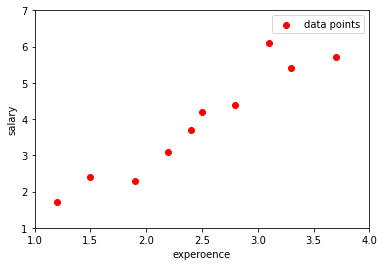

In [11]:
plt.scatter(data.experience, data.salary, color = 'red', label = 'data points')
plt.xlim(1,4,5)
plt.ylim(1,7)
plt.xlabel('experoence')
plt.ylabel('salary')
plt.legend()

##### Starting  the line plot using small values of parameter

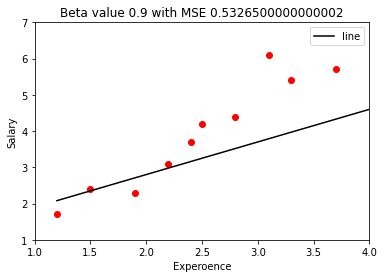

In [12]:
#We will start by making lines for different values of Beta 0.1,0.8,1.5
beta = 0.9
# keeping intercept constant
b = 1.0

# to store predicted points
line1 = []

# generating predictions for every data point
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)
    
    #plotting the line
plt.scatter(data.experience, data.salary, color = 'red')
plt.plot(data.experience, line1, color = 'black', label = 'line')
plt.xlim(1,4,5)
plt.ylim(1,7)
plt.xlabel('Experoence')
plt.ylabel('Salary')
plt.legend()
MSE = mse(data.experience, line1)
plt.title("Beta value "+str(beta)+" with MSE "+ str(MSE))
MSE = mse(data.experience, line1)          

FRom the graph , the slope of the line is very less, hence will try out the highest low.

Now less uss beta = 1.5 and re-run the cell again.

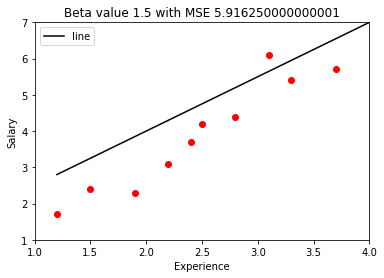

In [13]:
#We will start by making lines for different values of Beta 0.1,0.8,1.5
beta = 1.5
# keeping intercept constant
b = 1.0

# to store predicted points
line1 = []

# generating predictions for every data point
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)
    
    #plotting the line
plt.scatter(data.experience, data.salary, color = 'red')
plt.plot(data.experience, line1, color = 'black', label = 'line')
plt.xlim(1,4,5)
plt.ylim(1,7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
MSE = mse(data.experience, line1)
plt.title("Beta value "+str(beta)+" with MSE "+ str(MSE))
MSE = mse(data.experience, line1)          

Here, we have a better slope but is more than what we want.

So the right value might be somewhere in between so lets try 0.8

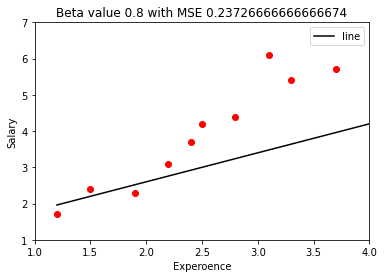

In [14]:
#We will start by making lines for different values of Beta 0.1,0.8,1.5
beta = 0.8
# keeping intercept constant
b = 1.0

# to store predicted points
line1 = []

# generating predictions for every data point
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)
    
    #plotting the line
plt.scatter(data.experience, data.salary, color = 'red')
plt.plot(data.experience, line1, color = 'black', label = 'line')
plt.xlim(1,4,5)
plt.ylim(1,7)
plt.xlabel('Experoence')
plt.ylabel('Salary')
plt.legend()
MSE = mse(data.experience, line1)
plt.title("Beta value "+str(beta)+" with MSE "+ str(MSE))
MSE = mse(data.experience, line1)          

We can observe that the mse ,mean squared error has come down.

##### Compputing Cost over a range of values of Beta

We can try this for various values of beta 

and see what is the relationship between beta
and mean suared error for the face value of b.

So we are not changing b.

So lets a create a function  def Error.

What this error variable does is that for a 

given value of beta ,it will give us the mean squared error for these data point

b is fixed for us , hence we will be trying 

different values of beta between 0 to 1.5

with increament of 100 which is equal to 0.01.

Hence, the first value will be 0, followed by 0.01, 0,02, 0,03 and so on 

lets append everything

Then convert all to a DataFrame

In [15]:
#function to calculate error

def Error(Beta, data):
    # b os constant
    b = 1.0
    
    salary = []
    experience = data.experience
    
    # Loop to calculate predict salary variables
      
    for i in range(len(data.experience)):    
        tmp = data.experience[i] * Beta + b 
        salary.append(tmp)
    MSE = mse(experience, salary)
    return MSE

In [16]:
# Range of slopes from 0 to 1.5 with increment of 0.01
slope = [i/100 for i in range(0,150)]
Cost = []
for i in slope:
    cost = Error( Beta = i, data = data)
    Cost.append(cost)


In [17]:
# Arrange in DataFrame
cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : cost
})
cost_table.head()

,Beta,Cost
0,0.00,5.775793
1,0.01,5.775793
2,0.02,5.775793
3,0.03,5.775793
4,0.04,5.775793


I DONT KNOW WHY I HAVE THESAME VALUES !!!!!!???

The DataFrame gives us the output of beta and cost

#### Visualisng cost with respect to Beta

We will visualise it by plotting it and we will get the plot below

From the graph, the value at zero is 3.72

This is the starting values, it goes down 

with increasing value of Beta gets to the minimum and starts increasing

The question is ,giving that we have this relationship, what are the values of Beta and

y for which we can find out this particular location where are cost is minimum

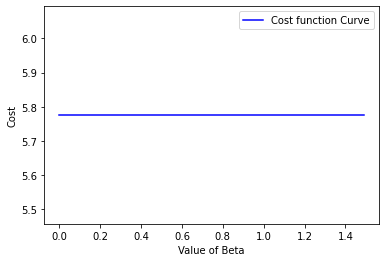

In [18]:
# plotting the cost values corresponding to every value of Beta

plt.plot(cost_table.Beta, cost_table.Cost, color = 'blue', label = 'Cost function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()          

We assumed b to be 0.1 but we want to change to b as well as Beta.

We will use gradiant technique to find the minimum value

QUIZ

Q. N0.1 .
.Cost function(J) of Linear Regression is the _Root mean square______ value between predicted y value (predicted) and true y value (y)?

Ans.



For the Linear regression model, the cost function will be the minimum of the Root Mean Squared Error of the model, obtained by subtracting the predicted values from actual values. The cost function will be the minimum of these error values.

N0.2. 

_________ is used to find local minima of the cost function?

ans.

Gradient descent is an efficient optimization algorithm that attempts to find a local or global minimum of the cost function.

3.

Advantages of the ReLU functions are? (Choose all that apply)

Ans 

ReLUs are much simpler computationally

Reduced likelihood of the gradient to vanish

The gradient is constant for z > 0


ans.
advantage of ReLU Function:

It doesn't allow for the activation of all of the neurons at the same time. 

i.e., if any input is negative, ReLU converts it to zero and doesn't allow the neuron to get activated.

This means that only a few neurons are activated, making the network easy for computation.

If the ReLU function is used for activation in a neural network in place of a sigmoid 

function, the value of the partial derivative of the loss function will be having values of

0 or 1 which prevents the gradient from vanishing. 

The use of ReLU function thus prevents the gradient from vanishing.

Understanding the Derivative of Relu.

As you may have noticed, relu(z) is 

differentiable in all of its domain except 

when z=0. In other words, the left and right

derivatives at z=0 exist BUT are not equal 

(i.e., at z=0, relu(z) is not differentiable).

194


Two additional major benefits of ReLUs are sparsity and a reduced likelihood of vanishing gradient.

But first recall the definition of a ReLU is

h=max(0,a)

 where a=Wx+b
.

One major benefit is the reduced likelihood of the gradient to vanish. This arises when a>0

. In this regime the gradient has a constant value. In contrast, the gradient of sigmoids


becomes increasingly small as the absolute value of x increases. The constant gradient of ReLUs results in faster learning.

The other benefit of ReLUs is sparsity. Sparsity arises when a≤0

. The more such units that exist in a layer the more sparse the resulting representation. Sigmoids on the other hand are always likely

to generate some non-zero value resulting in dense representations. Sparse representations seem to be more beneficial than dense representations.



4.

Maxout?

Ans.

has as special cases ReLU and Leaky ReLU


Maxout is another attempt to solve the dead neuron problem in ReLU. It takes the form . From this form, we can see that both ReLU and leaky ReLU are just special cases of this form, that is, for ReLU, it's .


has as special cases ReLU and Leaky ReLU

requires less parameters to be learned

can approximate any convex function

5.
What is activation function?

ans.


function used to enable Neural Network to solve non-linear problems

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs.

### Week 10 day 2: Pipeline Building

#### Introduction from machine learning pipeline.

A machine learning pipeline is used to help automate machine

learning workflows. They operate by enabling a sequence of data

to be transformed and correlated together in a model that can be

tested and evaluated to achieve an outcome, whether positive or
negative.

Machine learning (ML) pipelines consist of several steps to train a

model. Machine learning pipelines are iterative as every step is

repeated to continuously improve the accuracy of the model and

achieve a successful algorithm. To build better machine learning

models, and get the most value from them, accessible, scalable and

durable storage solutions are imperative, paving the way for onpremises object storage.

Now-a-days Data has become a modern-day currency.
Tremendous value and intelligence is being extracted from large,

captured datasets (Big data) that has led to actionable insights

through today’s world. It’s not just about storing data any longer,

but capturing, preserving, accessing and transforming it to take

advantage of its possibilities and the value it can deliver.

1. The main objective of having a proper pipeline for any ML

model is to exercise control over it. A well-organised

pipeline makes the implementation more flexible. It is like

having an exploded view of a computer where you can

pick the faulty pieces and replace it- in our case, replacing

a chunk of code.

2. The term ML model refers to the model that is created by
the training process.

3. The learning algorithm finds patterns in the training data

that map the input data attributes to the target (the
answer to be predicted), and it outputs an ML model that

captures these patterns.

4. A model can have many dependencies and to store all the

components to make sure all features available both

offline and online for deployment, all the information is

stored in a central repository.

5. A pipeline consists of a sequence of components which are

a compilation of computations. Data is sent through these

components and is manipulated with the help of
computation.

Pipelines are not one-way flows. They are cyclic in nature and

enables iteration to improve the scores of the machine learning

algorithms and make the model scalable.

Many of today’s ML models are ‘trained’ neural networks capable

of executing a specific task or providing insights derived from

‘what happened’ to ‘what  t will likely to happen’ (predictive

analysis).

These models are complex and are never completed, but

rather, through the repetition of mathematical or computational

procedures, are applied to the previous result and improved upon

each time to get closer approximations to ‘solving the problem’.

Data scientists want more captured data to provide the fuel to

train the ML models.
The goal for ML is simple: “ Make faster and better

predictions”

Challenges Associated with ML Pipelines

A typical machine learning pipeline would consist of the following
processes:


• Data collection

• Data cleaning

• Feature extraction (labelling and dimensionality
reduction)

• Model validation

• Visualisation

Please refer to diagram on the note book

GOGLE image ?

Data collection and cleaning are the primary tasks of any machine
learning engineer who wants to make meaning out of data.

But
getting data and especially getting the right data is an uphill task
in itself.

Data quality and its accessibility are two main challenges one will
come across in the initial stages of building a pipeline.


The captured data should be pulled and put together and the

benefits of collection should outweigh the costs of collection and
analysis.

For this purpose, a data lake is recommended for every
organisation.

A data lake is a centralised repository that allows the

user to store both structured and unstructured data at any scale. 

It
also enables ad-hoc analysis by applying schemas to read, not
write. 

In this way, the user can apply multiple analytics and
processing frameworks to the same data.

Since every case has its own bargain for the amount of data,

usually in an unsupervised setting, things can go out of hand if the

quantity of data available for training is less.

##### Use Cases

A machine learning model’s life cycle needs to be more adaptable

to model tuning and monitoring. With new data coming in

frequently, there can be significant changes in the outcomes.

Currently, improvements are being made to the existing neural

networks to make them run even when the data is vague and when
there is a lack of labelled training data.

#### A simple Python Pipeline

This snippet shows the objects and calls needed to create and run
a basic pipeline:

In [19]:
#ws = Workspace.from_config()
#blob_store = DataFrame(ws. "Workspaceblobstore")
# compute_target = ws.compute_targets["STANDARD_NC6"]
# experiment = Experiment(ws, 'MyExperiment')


# inputs_data = DataReference(
    # datastore=Datastore(ws, blob_store),
    # data_reference_name="test_data",
    # path_on_datastore="20newsgroups/20news.pk1")

# output_data = PipelineData(
    # "output_data",
    # datastore=blob_store,
    # output_name="output_data1")

 # Steps  = [ PythonScriptstep(
    # script_name="train.py",
    # arguements=["==input", input_data, "--output', output_data],
    # inputs=[input_data],
    # outputs=[output_data],
    # compute_target=compute_target,
    # Source_directory="myfolder"
 # )]
     
 # pipeline = pipeline(workspace=ws, steps=steps)
     
 # pipeline_run =  experiment.submit(pipeline) 
# pipeline_run.wait_for_completion()

Image by Shashanka Manyam

The snippet starts with common Azure Machine Learning objects,

a workspace, a Datastore, a Compute_Target and an Experiment.

Then, the code creates the objects to
hold input_data and output_data. 

The array steps holds a single
element, a PythonScriptStep that will use the data objects and run

on the Compute_Target. Then, the code instantiates
the Pipeline object itself, passing in the workspace and steps array.

The call to experiment.submit(pipeline) begins the Azure ML

pipeline run.

The call to wait_for_completion() blocks until the
pipeline is finished.


Until a project gets large or near to deployment, your pipelines

should be coarser rather than fine-grained. If you think of your ML

project as involving stages and a pipeline as providing a complete

workflow to move you through a particular stage, you’re on the
right path.

So happy tinkering!!


References:
    
    
https://docs.microsoft.com/en-us/azure/machinelearning/service/concept-ml-pipelines

#### An Introduction to Scikit-Learn: Machine Learning in Python

#### What is scikit-learn?

. Scikit-learn is an efficient tool for data mining and data analysis.

. It is built on Numpy,scipy and matplotlib

. It is an open source,commercially usable- BSD (botnany soft ware distribution)license.

It has very few restrictions as to what you can do with it.

. Another beautiful advantage is that you dont have to pay for it as a licensed site.

##### What we can achieve using scikit=learn

> Classification : Identify which category an object belongs to.

Application: Span detection.
Is it a span or not a span ,yes /No
In banking ,it a good loan or a bad loan.

> Regression : Predicting an attribute associated with an object.

Application: Stock prices prediction 

What is going to be the next value if stock price today is sold for $23.5 cents for share.

what do you think it is going to sell for tmor, the next day and the next day.

> Clustering : Automatic grouping of similar objects into sets.

Application : Customer segmentation

> Model Selection :  Comparing validating and choosing Parameters and models.

Application: Improves moddel accuracy via parameter tuning. 
So as to get the best out of it.

> Dimentionality Reduction : Reducing the number of random variables to consider.

Application : To increase model efficiency

Eg If you have a 1000s of datas coming in , a thousands of features, some will be duplicated.

Some you can combine to form a new column by 

reducing all those different features into 

smaller amount you can increase the efficiency of

your model,it can process faster and in some cases less bias.

If you weigh it on same feature, you can be 

biased over and over again it will be biased to that feature.



> Pre-processing : Feature extraction and normalization.

Applcation: Transferring input date such as text for use with machine learning algorithms.

In [20]:
# Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.neural_network import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [21]:
#Load the dataset
wine = pd.read_csv("C:\\Users\\user\\Downloads\\winequality-red (2).csv",sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We will be working on 12 features

Because we are pandas dataframw we can do 
wine.info() to get infor on the data we are working with

In [23]:
#Get infor .on data you are working with

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The non-null value can trip us off in pre-processing, ways to deal with non-null

i. if you have enough data you may just delete your non-null or fill the information in with the average or the most common values.

In [24]:
#This gives us a summation of how many null values in each one
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

If you have 90% of null values you may need to look for a different way to deal with it

In [25]:
#We will need to do pre-processing of the data
bins=(2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins, labels = group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [26]:
label_quality = LabelEncoder()

In [27]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [28]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [29]:
#To find out the no of wines with high quality
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

From here we can see that the number of wine with high quality is 217 , the rest is poor quality

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

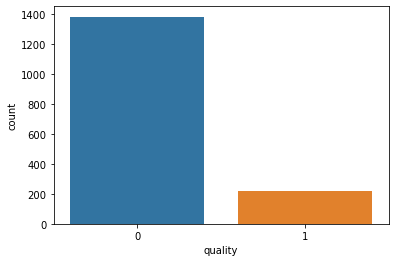

In [30]:
sns.countplot(wine['quality'])

Blue represents low quality wine, brown reps high qualty wine

In [31]:
#Now seperate the dataset as reponse variable and feature variables
X= wine.drop('quality', axis = 1)
y = wine['quality']

To know how good our model is , we use train-test-split

In [32]:
X_train,X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
#Applying Standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Random forests has a variety of applications, such as recommendation engines, image 

classification and feature selection.

It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases.

It lies at the base of the Boruta algorithm, which selects important features in a dataset.

Random Forest Classifier is a neural network

Note,

in sklearn we use fit, transform and predict and these are the 3 line of codes to build our random forest classifier.

In [34]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [35]:
pred_rfc[:20] #the first 20 variables

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

From our result, three are good quality the rest are bad quality.

In [36]:
X_test[:20]

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01,
        -3.86510130e-02,  5.18158057e-01, -1.81975648e-01,
        -1.99566462e-02,  1.75731759e-01, -4.65392578e-01,
        -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01,
        -6.65728970e-01, -1.30756387e-01,  4.97010797e-01,
         1.68066777e+00, -4.17191190e-01,  5.08915214e-01,
        -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01,
         1.00699644e-01,  3.76208022e-01,  1.09018543e-01,
        -3.84376165e-01,  1.95450060e+00, -2.05577167e-01,
         1.83329452e+00, -4.92358280e-01],
       [ 1.02293339e-01, -3.93733284e-01,  1.92092221e-01,
        -2.12839335e-01, -2.11870693e-01,  1.56398950e+00,
         3.44462872e-01,  6.60850535e-01,  1.19192097e-01,
        -6.87670232e-01, -5.87389780e-01],
       [-9.42051337e-01, -3.93733284e-01, -1.66199791e-01,
        -5.96053642e-01, -2.32149269e-01,  2.06016607e-01,
  

Steps

i.we create our training variable

ii. fit our model

iii. then predict

We use it to find out how well our model performs.

In [37]:
#Lets seee how well our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320



Pipe line building is a concept in machine learning that helps to create a process flow.It helps you to write a good code and much shorter code, that  humans will understand.

In [38]:
I DDONT UNDERSTAND THIS EXPLANATION !!!

SyntaxError: invalid syntax (Temp/ipykernel_14048/2640427143.py, line 1)

Our classification report shows how good our model is 

#### SVM Classifier

SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages.

This is one of the reasons we use SVMs in machine learning. It can handle both classification and regression on linear and non-linear data.

It works better with small numbers

In [ ]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [ ]:
#Let's se how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

#### Neural Network

It is very god with big data e.g stocks

A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain.

It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain.

In [ ]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [ ]:
#Let's see how our model performed 
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

In [ ]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

In [ ]:
wine.head(10)

In [ ]:
#We use random numbers to test new wine

Xnew = [[7.3,0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

from the result, it shows that it is a bad wine.

### Scikit Learn Tutorial 4 – Building a Pipeline

A typical pipeline consists of  a pre-processing step that transforms or inputs the data and the final predictor that predicts target values.

Transformers and estimators(predictors) can be combine together into a single unifying object called a pipeline.

Pipeline is combining diferent transformers and estimators or to make machine learning work close.

This is because it sequentially applies a list of transformers and the final estimator.

##### Import the necessary libraries

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.
target,test_size=0.2,random_state=42)
pipe_Ir=Pipeline([('minmax', MinMaxScaler()) ,('Ir', LogisticRegression())])
pipe_Ir.fit(X_train,y_train)
                  

In [ ]:
score=pipe_Ir.score(X_test,y_test)
score

Our sample is 90% accurate in guessing the unknown example it has not seen before.

We have created a simple pipeline using the MinMaxScaler and applying the simple linearLogisticRegression for classifying

#### MinMaxScaler

MinMaxScaler. 

MinMaxScaler subtracts the minimum value in the feature and then divides by the range. 

The range is the difference between the original maximum and original minimum. 

MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data.

The transformation is given by:
    
 X_std = (X-X_min)/(X.max-X.max
                    
 X_scaled= X_std*(max-min)+min

Now-a-days Data has become a modern-day currency. Tremendous value and intelligence is being extracted from large, captured datasets (Big data) that has led to actionable insights through today’s world.

It’s not just about storing data any longer, but capturing, preserving, accessing and transforming it to take advantage of its possibilities and the value it can deliver.

The main objective of having a proper pipeline for any ML model is to exercise control over it. A well-organised pipeline makes the implementation more flexible. It is like having an exploded view of a computer where you can pick the faulty pieces and replace it- in our case, replacing a chunk of code.

The term ML model refers to the model that is created by the training process.
The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer to be predicted), and it outputs an ML model that captures these patterns.

A model can have many dependencies and to store all the components to make sure all features available both offline and online for deployment, all the information is stored in a central repository.

A pipeline consists of a sequence of components which are a compilation of computations. Data is sent through these components and is manipulated with the help of computation.
Pipelines are not one-way flows. They are cyclic in nature and enables iteration to improve the scores of the machine learning algorithms and make the model scalable.

Many of today’s ML models are ‘trained’ neural networks capable of executing a specific task or providing insights derived from ‘what happened’ to ‘what will likely to happen’ (predictive analysis).

These models are complex and are never completed, but rather, through the repetition of mathematical or computational procedures, are applied to the previous result and improved upon each time to get closer approximations to ‘solving the problem’. Data scientists want more captured data to provide the fuel to train the ML models.

The goal for ML is simple: “ Make faster and better predictions”

Challenges Associated with ML Pipelines
A typical machine learning pipeline would consist of the following processes:

Data collection

Data cleaning

Feature extraction (labelling and dimensionality reduction)

Model validation

Visualisation


QUIZ 

1. ————————– is used to help automate machine learning workflows?

Ans
Pipeline

Pipelines in machine learning are an infrastructural medium for the entire ML workflow. Pipelines help automate the overall MLOps workflow, from data gathering, EDA, data augmentation, to model building and deployment.

2. The main objective of having a proper pipeline of anyExercising Full Control machine learning model is ________________?


Ans.
Exercising Full Control

The Pipeline Approach Allows Machine Learning to Scale
Ultimately, the purpose of a pipeline is to allow you to increase the iteration cycle with the added confidence that codifying the process gives and to scale how many models you can realistically maintain in production.

3. A model can have many dependencies and to store all the components to make sure all features available both offline and online deployment, all the information is stored in a _______________________?

Ans.Centralised Repository

4.  Pipeline are one-way flows.

ans.
false

Most pipelines only flow in one direction, usually from an oil or gas source to a market hub.

5.  Which of these is not a process of machine learning pipeline?

Ans. Documentation

Challenges Associated with ML Pipelines A typical machine learning pipeline would consist of the following processes:

Data collection

Data cleaning

Feature extraction (labelling and dimensionality reduction)

Model validation

Visualisation

6. One of these is a process of machine learning pipeline?

ans. Model Validation

7. ________________ and _________________ are two main challenges of building a pipeline at an early stage?

ans.
Error Checking and Model Validation

But getting data and especially getting the right data is an uphill task in itself. Data quality and its accessibility are two main challenges one will come across in the initial stages of building a pipeline.

8. _________  is building a model that is capable of making predictions.

ans.
Predictive models

Predictive modeling is the general concept of building a model that is capable of making predictions. Typically, such a model includes a machine learning algorithm that learns certain properties from a training dataset in order to make those predictions.

9. After training the ML model, we see how accurately it predicts the answer/responds by _____________. For example – does it cry when I say something mean to it?

ans testing

Training and Testing Data


Machine learning uses algorithms to learn from data. They find patterns, develop understanding, make decisions, and evaluate those decisions. 

In machine learning, datasets are split into two subsets: training data and testing data. And it's important to know the difference between training and testing data.

The first subset is known as the training data — it’s a portion of our actual dataset that is fed into the machine learning model to discover and learn patterns. In this way, it trains our model. 

The other subset is known as the testing data. Once your machine learning model is built, i.e. trained, you need unseen data to test your model. This data is called testing data, and you can use it to evaluate the performance and progress of your algorithms’ training and adjust or optimize it for improved results. 

Trained enough, an algorithm will essentially memorize all of the inputs and outputs in a training dataset — this becomes a problem when it needs to consider data from other sources, such as real-world customers.

In data science, it’s typical to see your data split into 80% for training and 20% for testing.

The process of building a machine learning model is comprised of three steps: 

Feed - Feeding a model with training data
Define - The model learns patterns from the data 
Test - Finally, the trained model is tested with previously unseen data, i.e. test data.
Model Performance in Obviously AI
Let’s take a look at a report generated in Obviously AI. We used a sample dataset for employee attrition on our platform. 

The Overview tab, pictured above, shows us our report.

Model performance in Obviously AI
If we navigate to the advanced graphs tab, pictured below, we seethe graphical analysis of the performance of the classification model on the test data. This section helps Obviously AI users to quickly visualize model performance and decision making. Remember: machine learning models are trained on 80% of data and model performance is evaluated on the other 20% of the data. This is the information we’ll be working with in the advanced graphs section.

Here, we see three types of visualizations:

A decision tree
A confusion matrix
A bar chart depicting the Actual vs. Predicted values


The advanced graphs section in obviously AI shows model performance of the report

10. An ML model needs _________ to generate data to learn from?

Answer :Training

Supervised machine learning models require labeled datasets which have been prepared by a data scientist. The training dataset will therefore include input and labeled output data. The model then learns the relationship between input and output data.

### Week 10: Day 3 – Hyperparameter Tuning 

### Introduction to Hyperparameter Tuning


Data Science is made of mainly two parts. Data analytics and machine
learning modeling. Although Data Science has a much wider scope, the
above-mentioned components are core elements for any Data Science
project. Let me quickly go through the difference between data analytics and
machine learning.
For any Data Science project, having historical data is a key essence. This
data might not be in the format that makes sense, or we might need to
process the data to get insights from the same. To achieve insights, the below
process is important.

1. Data Analytics – Historical data has a lot to say, so to hear what it
has in store for us, we need to analyze it thoroughly. We can get
insights into how variables are related to each other, which variable
adds what value to the data, do we have any missing value, do we

have any extreme (outlier) values, etc. Data description, data
pre-processing, data munching, data cleaning, and exploratory data
analysis all come under one umbrella, i.e., Data Analytics.

2. Machine Learning– Post doing data analytics, these insights should
be used in the most sought-after way to predict the future values.
How to do that? To answer this, we have machine learning models.
When a machine learns on its own based on data patterns from
historical data, we get an output which is known as a machine
learning model. In a broad category, machine learning models are
classified into two categories, Classification, and Regression.

There is a list of different machine learning models. They all are different in
some way or the other, but what makes them different is nothing but input
parameters for the model. These input parameters are named as
Hyperparameters.

These hyperparameters will define the architecture of the
model, and the best part about these is that you get a choice to select these
for your model. Of course, you must select from a specific list of
hyperparameters for a given model as it varies from model to model.
Often, we are not aware of optimal values for hyperparameters which would
generate the best model output. So, what we tell the model is to explore and
select the optimal model architecture automatically. This selection procedure
for hyperparameter is known as Hyperparameter Tuning.
Now, the question arises why we need this? How would this help in my model?

 What will happen if we skip this step? The list is endless. So, here we
would discuss what questions this hyperparameter tuning will answer for us,
and then all the above questions will automatically get answered.

● What should be the value for the maximum depth of the Decision
Tree?

● How many trees should I select in a Random Forest model?

● Should use a single layer or multiple layer Neural Network, if multiple
layers then how many layers should be there?

● How many neurons should I include in the Neural Network?

● What should be the minimum sample split value for Decision Tree?

● What value should I select for the minimum sample leaf for my
Decision Tree?

● How many iterations should I select for Neural Network?

● What should be the value of the learning rate for gradient descent?

● Which solver method is best suited for my Neural Network?

● What is the K in K-nearest Neighbors?

● What should be the value for C and sigma in Support Vector
Machine?

Above mentioned are just a few questions which could be answered by
hyperparameter tuning.

Each model has its own sets of parameters that need
to be tuned to get optimal output. For every model, our goal is to minimize the
error or say to have predictions as close as possible to actual values. 

This is
one of the cores or say the major objective of hyperparameter tuning.

This can be particularly important when comparing how different machine
learning models are performing on a dataset. Would it be justified to compare
a Random Forest model with hyperparameters against an SVM model which
is not optimized in terms of hyperparameter?
In this article, I would be explaining following approaches to Hyperparameter
tuning:

● Manual Search
● Random Search
● Grid Search


Manual Search
While using manual search, we select some hyperparameters for a model
based on our gut feeling and experience. Based on these parameters, th


#### Manual Search

While using manual search, we select some hyperparameters for a model
based on our gut feeling and experience. Based on these parameters, the model is trained, and model performance measures are checked.

This
process is repeated with another set of values for the same hyperparameters
until optimal accuracy is received, or the model has attained optimal error.
This might not be of much help as human judgment is biased, and here
human experience is playing a significant role.


#### Random Search

Though manual search is an iterative process, each time a specific value is
given for hyperparameters to acquire optimal model performance measures, it
is an exhaustive approach. Instead of doing multiple rounds of this process, it
would be better to give multiple values for all the hyperparameters in one go
to the model and let the model decide which one best suits. 

Those who are
aware of hyperparameter tuning might say that I am talking about grid search,
but no, this is slightly different. Out of the values mentioned, the model
randomly makes combinations of its own and tries to fit the dataset and test
the accuracy.

Here, chances are there to miss on a few combinations which
could have been optimal ones. Although, random search consumes quite less
amount of time and most of the time it gives optimal solutions as well. So, in
that case, it is a win-win situation.


#### Grid Search

As mentioned above, in a random search, grid search also uses the same
methodology but with a difference. In this method, each combination of
hyperparameter value is tried. This makes the process time consuming, or in
short, inefficient. Say we have given 20 different hyperparameter values for 4
different hyperparameters. Then there would be 160,000 trials for a model.
This sounds a big number and assumes how much time it would consume for
a large dataset. Along with this, cross-validation is also added to the grid
search, which increases this trial number to 1,600,000 (if 10-fold
cross-validation is used)

This method is quite an expensive method in terms of computation power and
time, but this is the most efficient method as there is the least possibility of
missing out on an optimal solution for a model.
Let’s quickly understand the concept of cross-validation also as it is preferred
to use it while doing grid search or random search for hyperparameter tuning.

#### Cross Validation

While creating any machine learning models, we generally divide the dataset
into train sets and test sets. The train set is used to make machines learn the
pattern and create a model for future prediction. The test dataset is used to
test model performance such that it considers this data as unseen data. When
we use cross-validation, even the train set is divided into N partitions to make
sure that our model is not overfitting.

K-fold is the most commonly used cross-validation technique. Here training
data is divided into K partitions and then the model is iteratively trained on the
k-1 partition and test it with the leftover partition. Once having trained K time,

the model, we then average the training results obtained from each iteration to
obtain overall model performance resu

Below are hyperparameters listed for few of machine learning models:

● Decision Tree

● max_features = max number of features considered for splitting a
node

● max_depth = max number of levels in each decision tree

● min_samples_split = min number of data points placed in a node
before the node is split

● min_samples_leaf = min number of data points allowed in a leaf node

● Random Forest

● n_estimators = number of trees in the forest

● max_features = max number of features considered for splitting a node

● max_depth = max number of levels in each decision tree

● min_samples_split = min number of data points placed in a node
before the node is split

● min_samples_leaf = min number of data points allowed in a leaf node

● bootstrap = method for sampling data points (with or without
replacement)

● Artificial Neural Network

● Hidden_layer_sizes = Number of neurons

● max_iter = max iterations required

● solver = solver method required for gradient descent

● tol = learning rate for minimization loss


#### Conclusion

Here, we explored three methods for hyperparameter tuning. While this is an
important step in modeling, it is by no means the only way to improve
performance

### Hyperparameter Tuning Machine Learning 

Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model. If we don’t correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don’t minimize the loss function. 

This means our model makes more errors. In practice, key indicators like the accuracy or the confusion matrix will be worse.

#### Basis of Hyper parameter Tuning

In simple terms it allows us to choose the correct parameter and get the best accuracy score for our model

Hyper parameter tuning is used to build the hyper parameter of a model to increase its accuracy.

Using the support vector machine as an example,
When you are training a support vector machine you need to set alot of parameters as this parameters will determine how your machine learning model will get trained or how long it will get trained and how it will begin with any training session and how the training session will go and how long it will go on. 

You can get more information on sklearn library for support vector machine . google search (sklearn.svm.SVC)

In [39]:
Here are some default parameters:

   # lass sklearn.svm.SVC(*, C=1.0, kernel='rbf',
#degree=3, gamma='scale', coef0=0.0, shrinking=True, 
#probability=False, tol=0.001, cache_size=200, 
#class_weight=None, verbose=False, max_iter=-1,
#decision_function_shape='ovr', break_ties=False,
#random_state=None)[so

SyntaxError: invalid syntax (Temp/ipykernel_14048/2908251396.py, line 1)

You can see alot of parameters. 
these parameters will  help you understand how your model works.

it also takes care of how your model will be. the interactions and how it will train itself to figure out the classification problems.

For instance,if you have a dataset and you want to use it to  classify your algorithm or train it on a classification problem, if you dont set any parameters, these default parameters can help you train your model

It might not give you the best accuracy but it will give you the acuracy set by the default parameter.

You can also change the parameters to diffent values to see how it affects your model using the hyper parameter tuning.

For instance, if you have trained model with the default parameters and you change it and you get the best result in the accuracy score ,it means that that model is better than the previous one and you need to pick it.

Most of these parameters have so many options hence how to identify the one for a particular training  and how to go about choosing it may be a problem.

Since machine learning is based on Statistic, probability and calcius there is no vehicle to detemine the one to choose.

If you want to earn how to choose one, you need to try alot of combinations.

This is were hyper parameter tuning comes into play.

In hyper parameter tuning we take a list of the possible options for  the hyper parameter tuning we have chosen.

We choose alot of combinations in those hyper parameters then we pick the ones that will give us the best result.

You need to pick alot of parameters for experimentation

#### Types of hyper parameter tuning

Two types of hyperparameter Tuning we can use in choosing our parameters  are :

>. Grid search Algorithm

>. Random Search Algorithm

 Grid search Algorithm

What is Grid Search? Grid search is essentially an optimization algorithm which lets you select the best parameters for your optimization problem from a list of parameter options that you provide, hence automating the 'trial-and-error' method

Random Search Algorithm


A random search algorithm refers to an algorithm that uses some kind of randomness or probability (typically in the form of a pseudo-random number generator) in the defi- nition of the method, and in the literature, may be called a Monte Carlo method or a stochastic algorithm.

. You use it when you have limited resource

. It may not give you the best result

. It is also used in very large samples

#### Support vector machine 

How to use hyper parameter tuning to get the best accuracy on a support vector machine model

Import necessary libraries

In [40]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [41]:
dataset = pd.read_csv("C:\\Users\\user\Downloads\\Social_Network_Ads.csv")

In [42]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [43]:
# dataset.info()

On the classification problem, we will be looking at the age and EstimatedSalary.

lets split the data into x and y columns
x is the data we have existing and 
y is the dta we are tring to predict

We will extract the age and estimatedsalary from the dataset we just loaded.
for x we wil use iloc ,which helps you to locate your data
We want just age and estimated salary  so we will use iloc[:2], in pandas the counting starts from zero which is the first index, which are in columns [2,3]

y is the  column we are trying to predict ,which is the purchase column which is at the 4th column [:4]

In [44]:
x = dataset.iloc[:, [2, 3]]
y = dataset.iloc[:,4]

In [45]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

Next,we need to train the classification model, 
To achieve that we have already split the dataset into x and y and we will use the train test split split and pass in the x,y columns and specify the testing size (0.25)

You can check the size of the dataset using  x_train.shape and x_test.shape and do same for y_train and y_test

In [47]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=.25)

In [48]:
#x_train.shape

In [49]:
#x_test.shape

Now we will train our model using the SVC algorithm

first  use the cif and the default method cif = SVC()
then fit our data by passing in the training parameters both x and y train

In [50]:
clf = SVC()

In [51]:
clf.fit(x_train, y_train)

SVC()

MY RESULT IS DIFFERENT !!!!!

Let's take a look at how our model is performing.

Since the predictions are made ,we need to find out if the predictions are right or wrong
we use sklearn.metrics to predict and import accuracy

In [52]:
#y_pred = clf.predict(x_test)

In [53]:
#accuracy_score(y_test, y_pred)

The score is on the average but we can get something better using the Hyper parameter tuning

First , lets create a grid of all the possble values using a dictionary.

we will create an array of all the possible values in a list using dictionary

lets choose 1, 10 100 ,1000, remember to take a look at the sklearn.SVC to know the prameters to choose from

In [54]:
grid = {
    'C': [1, 10, 100, 1000],
    'kernel': ['rbf', 'linear'],
    'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

In [55]:
#grid_search_cv = GridSearchCV(SVC(), param_grid=grid, scoring='accuracy')

The gridsearch wil be the classifier we want to use
We cannot use the clf again because it has already been trained.

Hence, we need to pass in a fresh classifier

(param_grid-grid, then we need to score it  scoring = 'accuracy' you can also use other parameter like R-sqauerd score, though it is concerned in reducing the error and you use it in regresors. 

Regressors are not concerned with the accuracy but on the error produced by our model .

Problem with grid search is that it takes alot of time.

If it takes a lot of time to run. you may have to rescale your data to make it smaller.

In [56]:
Feature scaling is used to bring your variable to comparable scale

SyntaxError: invalid syntax (Temp/ipykernel_14048/3058328295.py, line 1)

After creating it, we need to fit it and pass the x and y train data 

In [57]:
#grid_search_cv.fit(x_train, y_train)

The code is taking alot of time to run and this is one of the problems of grid sarch, it takes a lot of time ,especialyy when the dataset is large

Hencem we will recsale the data using sklearn preprocesing function

In [58]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
y_pred = clf.predict(x_test_scaled)

In [60]:
accuracy_score(y_test, y_pred)

0.6

Scaling increases the algorithm performance

Our result is low.
shitf + tab is used to check functions of different parameters

If your result you may need to scale it using n_job 

In [61]:
grid_search_cv = GridSearchCV(SVC(), param_grid=grid, scoring='accuracy', n_jobs=-1)

In [62]:
grid_search_cv.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [63]:
grid_search_cv.best_score_

0.9266666666666665

Our scoore is high, note if you train it multiply times , you will get different results.

To search for the parameters used .you can use the best params property

In [64]:
grid_search_cv.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

We can see that we are getting close to what we already have.

If you want to use the random search algorithm , you will have to import it, just include RandomizedSearchCV after the place tou imported GridSearchCV then re-run it

We will bbe using the same variables , 

In [65]:
rdm_search_cv = RandomizedSearchCV(SVC(), param_distributions=grid, n_jobs=-1)

In [66]:
rdm_search_cv.fit(x_train_scaled, y_train)

RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9],
                                        'kernel': ['rbf', 'linear']})

In [67]:
rdm_search_cv.best_score_

0.9266666666666665

In [68]:
rdm_search_cv.best_params_

{'kernel': 'rbf', 'gamma': 0.3, 'C': 10}

Note, that the scaling model helps you to get the right answer.
Make sure that when you are scaling it, that parameters you got from other source ,in the future you will need to scale the data again.


If you use unscaled data in your production evnironment, it will give you incorrect result.

Because you will be using the wrong data and you will be getting wrong answers.

Lets re-run the data again , and see what we get. note it will give you another result.

Sale your data, preprocess it and make sure you are using the correct tools for the correct work.


For big data use randomized searchCv and for small data use GridSearchCV.

#### QUIZ Hyperparameter Tuning: 

1. If searching among a large number of hyperparameters, you should try values in a grid rather than random values, so that you can carry out the search more systematically and not rely on chance. This statement is _______________?

FALSE

Note: Try random values, don't do grid search. Because you don't know which hyperparamerters are more important than others.

And to take an extreme example, let's say that hyperparameter two was that value epsilon that you have in the denominator of the Adam algorithm. So your choice of alpha matters a lot and your choice of epsilon hardly matters.

2. Every hyperparameter, if set poorly, can have a huge negative impact on training, and so all hyperparameters are about equally important to tune well. This statement is ____FALSE_______________?

Ans: We've seen in lecture that some hyperparameters, such as the learning rate, are more critical than others.



3. During hyperparameter search, whether you try to babysit one model (“Panda” strategy) or train a lot of models in parallel (“Caviar”) is largely determined by:

Ans"  The amount of computational power you can access

4. Finding good hyperparameter values is very time-consuming. So typically you should do it once at the start of the project, and try to find very good hyperparameters so that you don’t ever have to revisit tuning them again. This statement is _FALSE________

Ans: Note: Minor changes in your model could potentially need you to find good hyperparameters again from scratch.

5. Model Tuning is the process of maximizing a model’s performance by changing its _Hyperparameters_________?

Model tuning provides optimized values for hyperparameters, which maximize your model's predictive accuracy.


Model tuning is the experimental process of finding the optimal values of hyperparameters to maximize model performance. Hyperparameters are the set of variables whose values cannot be estimated by the model from the training data. These values control the training process.

6. Write down one mean for model tuning :

Ans. Cross Validation

7. Hyperparameters are :  Arbitrarily set and adjusted

Hyperparameters refer to the parameters that the model cannot learn and need to be provided before training. Hyperparameter tuning basically refers to tweaking the parameters of the model, which is basically a lengthy process.

Hyperparameters = are all the parameters which can be arbitrarily set by the user before starting training (eg. number of estimators in Random Forest). Model parameters = are instead learned during the model training (eg. weights in Neural Networks, Linear Regression).

8. Optimization method that allow us to test a range of hyperparameters and to compare performances in order to deduce the best setting. This statement applies to ___Grid Search__________

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator.

9. Hyperparameter tuning can be used to answer which of these questions? (Choose all that apply)

Answer: 
How many neurons should I include in the Neural Network?

What value should I select for the minimum sample leaf for my Decision Tree?

What should be the value of the learning rate for gradient descent?

Hyperparameter tuning takes advantage of the processing infrastructure of Google Cloud to test different hyperparameter configurations when training your model. It can give you optimized values for hyperparameters, which maximizes your model's predictive accuracy.

10. One of the core objectives of hyperparameter tuning is ____Accurate prediction____________?

### Week 10: Day 3 – Grid Search 

#### Introduction to Grid Search lecture notes

#### Machine Learning in short

The goal of supervised Machine Learning is to build a prediction
function based on historical data. This data has independent
(explanatory) variables and a target variable (the variable that you
want to predict).

Once a predictive model has been built, we measure its error on a
separate testing data set. We do this using KPIs that allow
quantifying the error of the model, for example, the Mean Square
Error in a regression context (quantitative target variable) or the
Accuracy in a classification context (categorical target variable).

The model with the smallest error is generally selected as the best
model. Then we use this model to predict the values of the target
variable by inputting the explanatory variables.

In this article, I will deep-dive into GridSearch.

Machine Learning’s Two Types of Optimization
GridSearch is a tool that is used for hyperparameter tuning.

As
stated before, Machine Learning in practice comes down to
comparing different models to each other and trying to find the best working model.

Apart from selecting the right data set, there are generally two
aspects of optimizing a predictive model:

1. Optimize the choice of the best model
2. Optimize a model’s fit using hyperparameters
tuning

Let’s now look into those to have an explanation for the need for
GridSearch.

Part 1. Optimize the choice of the best model

In some datasets, there may exist a simple linear relationship that
can predict a target variable from the explanatory variables. In
other datasets, these relationships may be more complex or highly
nonlinear.

At the same time, many models exist. This ranges from simple
models like the Linear Regression, up to very complex models like
Deep Neural Networks.


It is key to use a model that is appropriate for our data.

For example, if we use a Linear Regression on a very complex task,
the model will not be performant. But if we use a Deep Neural
Network on a very simple task, this will also not be performant!

To find a well-fitting Machine Learning model, the solution is to
split data into train and test data, then fit many models on the
training data and test each of them on the test data. The model
that has the smallest error on the test data will be kept.

A screenshot from Scikit Learn’s list of supervised models shows that there are a lot of models to
try out!

Part 2. Optimize a model’s fit using hyperparameters tuning

After choosing one well-performing model (or a few), the second
thing to optimize is the hyperparameters of a model.

Hyperparameters are like a configuration of the training phase of
the model. They influence what a model can or cannot learn.

Tuning hyperparameters can, therefore, lower the error on the test
data set even more.

The way of estimating is different for each model, and thus each
model has its own hyperparameters to optimize.

input right up

One way to do a thorough search for the best hyperparameters is
to use a tool called GridSearch.


#### What is GridSearch?

GridSearch is an optimization tool that we use when tuning
hyperparameters. We define the grid of parameters that we want
to search through, and we select the best combination of
parameters for our data.

The “Search” in GridSearch

The hypothesis is that there is a specific combination of values of
the different hyperparameters that will minimize the error of our
predictive model. Our goal using GridSearch is to find this specific
combination of parameters.

The “Grid” in GridSearch

GridSearch’s idea for finding this best parameter combination is is
simple: just test each parameter combination possible and select
the best one!

Not really each combination possible though, since for a
continuous scale there would be infinitely many combinations to
test.

The solution for this is to define a Grid. This Grid defines for
each hyperparameter, which values should be tested.

input diagram

A schematic overview of GridSearch on two hyperparameters Alpha and Beta (graphics by
author)

























In an example case where two hyperparameters — Alpha and
Beta— are tuned:

we could give both of them the values [0.1, 0.01,
0.001, 0.0001] resulting in the following “Grid” of values. 

At each
crossing point, our GridSearch will fit the model to see what the
error at this point is.

And after checking all the grid points, we know which parameter
combination is best for our prediction.
The “Cross-Validation” in GridSearch
At this point, only one thing remains to be added: the CrossValidation Error.

When testing the performance of a model with each combination
of hyperparameters, there could be a risk of overfitting. This
means that just by pure chance, only the training data set
corresponded well to this particular hyperparameter combination!
The performance on new, real-life data, could be much worse!
To get a more reliable estimate of the performances of a
hyperparameter combination, we take the Cross Validation Error.








A schematic overview of Cross-Validation (graphics by author)
In Cross-Validation, the data is split in multiple parts. For
example 5 parts. Then the model is fit 5 times while leaving out
one-fifth of the data. This one-fifth left-out data is used to measure
the performances.
For one combination of hyperparameter values, the average of the
5 errors constitutes the cross-validation error. This makes the
selection of the final combination more reliable

#### What makes GridSearch so important?

GridSearch allows us to find the best model given a data set very
easily. It actually makes the Machine Learning part of the Data
Scientists role much easier by automating the search.

On the Machine Learning side, some things that still remain to be
done is deciding on the right way to measure error, deciding on
which models to try out and which hyperparameters to test for.
And the most important part, the work on data preparation, is also
left for the data scientist.

Thanks to the GridSearch approach, the Data Scientist can focus
on the data wrangling work, while automating repetitive tasks of
model comparison. This makes the work more interesting and
allows the Data Scientist to add value where he’s most needed:
working with data.

A number of alternatives for GridSearch exist, including Random
Search, Bayesian Optimization, Genetic Algorithms, and more. I
will write an article about those soon, so don’t hesitate to stay
tuned. Thanks for reading!

#### Grid Search 

Grid search allows us to scan through multiple free parameters with few lines of code.

Parameteres like the term alpha are not part of the fitting process.

In the last section, the term alpha in Ridge regression is called a hyperparameter.

Scikit learn have a means of automatically itirating over these parameters using cross -validation called Grid search.

Grid search takes the model or object we would like to train and different values of the hyperparameters and it then calculate the mean squared error or R=Squared for various hyperparameter values.

Allowing you to choose the best values,

The small circles in the diagram represents different hyperparameters

We start off with one value for hyper parameters and train the model.

We use different hyperparameters to train the model.
we continue the process until we have exhausted the different free parameters.

You select the hyper parameter that minimizes the error.

Split our dataset into 3 parts,

> training set

> Validation set 

> Test set


Train the model for different hyper parameters

We use the R=Squared or mean squared error for each model

We select the hyperparameter that minimizes the mean square error or maximizes the R-squared on the validation set.

We finally test our model performance on the test data.


The scikit learn web page 

sklearn.linear_model.Ridge

The attribute of an object are also called parameters.

We will not make the distiction even though some of the options are not hyperparameters per say.

In this model, we will focus on the hyper parameter 'alpha' and the normalization parameter.

The value of your grid search is a python list that contains a python dictionary.

The key is the name of the free parameter.
the value of the dictionary is the different values of the free parameter.

This can be viewed as a table with the various free parameter values 


Alpha  1  10   100   1000

We also have the object or model

In [62]:
parameters = [{'alpha' : [1, 10, 100, 1000]}]

The grid Search  takes on the scoring method, in this case R- sqaured the number of folds , the model or object Rigde() and the free parameter values

Some of the outputs includes the different scores for different free parameter value, in tis case the R=squared along with the free parameter values that have the best score.

First we import the libraries we need including grid searchCV 

The dictionary of parameter values 

We create a Ridge regression object or model

We then create a GridSearchCv object, the inputs are te ridge regression object

The parameter values are the number of falls

We will use R=Squared , this is the default scoring method.

We fit the object

we can find the best value for the free parameters using the attributes best estimator

We can also get information like the mean score on the validation data using the attributes cv result


In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}]

RR=Ridge()

Grid1 = GridSearchCV(RR,parameters1,cv=4)

Grid1.fit(X_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

Grid1.best_estimator_

scores = Grid1.cv_results_
scores['mean_test_score']

NameError: name 'X_data' is not defined























One of the advantages of grid search is how quickly you can test multiple parameters.

For example, retrogression have the option to normalize the data.

To see how to standardize, check module 4

The term alpha is the first element in a dictionary, the second element is the normalized option

The key is the name of the parameter. the value is the different options in this case because we can either normalize the data or not, the values are True or Fales respectively.

The dictionary is a table or grid that contains two different values

In [ ]:
parameters = [{'alpha' : [1, 10, 100, 1000,'normalize': [True, False}]

As before , we need the ridge() regression object or model.

The procedure is similar except we hve a table or grid of different paramater values

The output is the score of all the different combination parameter values 

The code is also similar.

The dictionary also contains thesame free parameters

We can find the best values for the free parameters

The resulting scores is thesame free parameters that is scored in the dictionary

We can print out the scores for the different free parameter values

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}]

RR=Ridge()

Grid1 = GridSearchCV(RR,parameters1,cv=4)

Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

Grid1.best_estimator_

scores = Grid1.cv_results_

scores = Grid1.cv_results_


for param.mean_val, mean_test inzip(scores['params'],scores['mean_test_score'],scores['mean_train_score']):
         
        print(param,"R^2 on test data:", mean_val,"R^2 on trian data:",mean_test)
    

#### Machine Learning Session – Grid Search 

### Topics:

> Train_test_split to find model perfomance

> K fold cross Validation

> GridSearchCV for hyperparameter tuning

> RandomizedSearchCV

> Choosing best model

>  Exercise

We will be discussing how to choose the best model for a given machine learning problem and how to do hyperparameter tuning.

Above is the list of topics we will cover in this session

#### sklearn iris flower dataset

For instance if you want to classify irish flower dataset.

Based on the petal and sepal length ,you are trying to predict what type of flower it is.

#### Model selection

The first question that arises is , Which model should i use.

There are so many models to choose from


> Random Forest

> SVM

> Decision Tree

> Logistic Regression

> Naive Bayes

among others

Lets say you figured out that the model to use is SVM

The problem doesnt end there. you now have hyperparameters, 

what kind of gamma , C and kernel should i be using .(These are parameters in sklearn.svm.SVC dictionary)

There are so many values to choose from

The process of choosing the optimiun parameter is called hypertuning.

In [ ]:
#model = svm.SVC(kernel='rbf',C=30,gamma='auto')

#### Load the necessary libraries

In [153]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [154]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:52]            

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


The traditional approach we can use to solve this problem is train_test_split method to split our dataset into training and test 70/30 partition.

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3) 

First ,lets try SVM model

we will look at how to do hyperparameter tuning

How to choose the model

In [232]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9111111111111111

When using the SVM model, you can

> train the model

> Calculate the score

You can randomly initialize the parameters as you may not know the best parameter, so you just introduce some values.

Based on your train and test set, the score might vary as you run it over and over again, to control that we use the k-fold cross validation

What we do in k-fold cross validation is to divide data samples into n -number of folds.

For example, lets say we are using 5 folds .

You will take itiration in each fold, one fortest set and the remaining for training set and we find the score for that itiration

We take this individual scores from each itirations and we make an average.

This appraoch works very well because you are going through all the samples.

We have a method called cross_val_score which can tell you the score of each itiration

So we will use it for 5 folds

In [233]:
from sklearn.model_selection import cross_val_score

In [234]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma=
                        auto'),iris.data,iris.target, cv=5)

SyntaxError: EOL while scanning string literal (Temp/ipykernel_14048/4244179162.py, line 2)

In [159]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma=
                        auto'),iris.data,iris.target, cv=5)

SyntaxError: EOL while scanning string literal (Temp/ipykernel_14048/3607461267.py, line 2)

In [67]:
cross_val_score(svm.SVC(kernel='rbfr',C=20,gamma=
                        auto'),iris.data,iris.target, cv=5)

SyntaxError: EOL while scanning string literal (Temp/ipykernel_13948/852955682.py, line 2)

The challenge with this method is that it is too manual, it will take a lot of time . note, your C can be equal to 100, you ccan change to what value you want to test your model with.

you can change your kernel to linear or rbf

From the result you can see 5 differnt values , youcan add up and take the average score and based on that ,you can determine the optimal value for these parameters.

Another approach you can take is to run a fore loop

Hence, we will be doing thesame thing using a fore loop

In [68]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [69]:
import numpy as np
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores =  cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '-' + str(cval)] = np.average(cv_scores)
avg_scores

{'rbf-1': 0.9800000000000001,
 'rbf-10': 0.9800000000000001,
 'rbf-20': 0.9666666666666668,
 'linear-1': 0.9800000000000001,
 'linear-10': 0.9733333333333334,
 'linear-20': 0.9666666666666666}

With this you can find out the optimal score using the hyper parameter tuning

From our result, we can see that linear 1 : 0.9800000001 is the best  score to use

This approach also have some issues.

For example , if i have 4 prameters  for example, it means i have to run like 4 loops which will be too many iterations and it is not convenient

sklearn provides an api called GridSearchCV which will do the exact same thing with a single line of code

Steps 

Import gridsearchcv from sklearn model

Define your classifier
It will be the gridsearchcv where the first thing will be your model. gamma='auto' note instead of auto you can also input the parameters, then your parameter grid, but in parametergrid you will say i want the value of C to be [1,10.20] ie the different values you want to try.

then the second parameter is kernel and you want the value of your kernel to be linearaand rbf

We have other parameters in grid searchcv ,for example how many parameters you want to run

Grid searchcv also uses cross validation, the only differnce is that we are making the whole block of code convenient by writng it in one line of code


In [222]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf', 'linear']
}, cv=5, return_train_score=False) # to return parameter we dont need

clf.fit(iris.data,iris.target) #loop in your data
clf.cv_results_ # To get cross validation result

{'mean_fit_time': array([0.00179467, 0.00151062, 0.00179696, 0.00119648, 0.00159526,
        0.00119677]),
 'std_fit_time': array([0.00039892, 0.00044656, 0.00040056, 0.00039919, 0.00048803,
        0.00074625]),
 'mean_score_time': array([0.00079842, 0.00078692, 0.00099483, 0.00039997, 0.00079832,
        0.00079794]),
 'std_score_time': array([3.99216812e-04, 3.93965954e-04, 3.94249470e-06, 4.89863277e-04,
        7.46633331e-04, 3.98969921e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

cv results are not easy to view but luckily sklearn provides a way to download these results into a dataframe.

you can check it out on sklearn documentation

Next, create a pandas dataframe and supply cv result as an input, we will get the table below, showing the C parameter values ,kernel values and scores from each individual split. we also have mean test score.

Some of the scores may not be useful so we are going to trim it down.

So we look at parameter values and mean score

In [223]:
df = pd.DataFrame(clf.cv_results_) 
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001795,0.000399,0.000798,0.000399,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001511,0.000447,0.000787,0.000394,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001797,0.000401,0.000995,0.000004,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001196,0.000399,0.000400,0.000490,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001595,0.000488,0.000798,0.000747,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001197,0.000746,0.000798,0.000399,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [230]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


After trimming it down we can see clearly  the parameter values of C ,kernel values and mean test score.

Bassed on this we can supply the first 3 values into my parameter to get the best performance.
If ypi remember we have done the hyper tuning of these parameters.

You can have many parameters , all you have to do is supply them in parameter grid and the gridsearchcv will do the pemutation and combination of each of these parameters using clf cross validation and it will show you all the result in the pandas dataframe as we have above.

We can also do dir on myclassifier and it will show you other properties this object have

In [73]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

We have parameters like best score , but estimator.

Lets check out best score 

In [225]:
clf.best_score_

0.9800000000000001

We have 0.98 as the best score

To find out the best parameters. we will do clf.best_params
In this case ,we have multiple parameters that gives you optimal performance but you acn see the points and this code helps you to get it.

These are the parameters you aree going to use for your model.

One issue that can happen with the gridsearchcv is the computation cost.
Our datasey in this lecture is very limited but when you have millions of data points into your dataset and the parametres ,you have so many values.

Right now  the  C values are 1 -10 , what if we have 1-50 , the computation cost will go very high and  this will literally try the compution amd combination  for every value in each of this parameters.

In [226]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

#### RandomizedSerachCV

To tackle thi scomputation problem, sklearn came up with another class called Randomized search cv.

This will not try every single combination and pemutation of parameters.

But it will try random combination of these parameter values.

You can choose wha those iterations can be

First import randomizedsearchcv class form the sklearn model selection

they look same as gridsearchcv

Then supply the parameter grade kernel, rdf linear, 
then cv=5 for cross validation

The most important parameter here is n-iteration
n_iter
 we want to try only 2 combinations
 
 In the first example , we tried a total of 6 ie 0 -5
 
In randomized it will try only 2 combination then we will call fit method and download the result into dataframe.

In [227]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf', 'linear']  
}, 
cv=5, 
return_train_score=False, 
n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.980000
1,20,rbf,0.966667


Fro the result we can see that it randomly ties C value to b e1 and 10 and and kernel value to be linear and rbf.

I i run it again , the value changes the value of c to be 20 and 10


This way it just randomly ties the values of c and kernel and it gives you the best score.

This works well in practical life becaues if you dont have too much computation power.

you just want to try random values of parameter and go with whatever comes out to be the best,

#### How to choose the best model for a given problem

For our irih data set .

We will be trying this two classifiers:

svm RandomForest
and logisticRegression

and we will figure out the one that gives the best performance

Steps:

You need to define your pararmeter grid

We define them using simple python dictionary

we are using the 3 values of random forest to be 1,5,10

n_estimator is an arguement in random forest classifier

Similarly the value C is an arguement/parameter in LogisticRegressionClassifier

after initializing the dictionary

Write a simple fore loop

The fore loop is just going through the dictionary values and for each of the value ,it will use Grid SearchCV

In gridsearch cv , the first arguement is the classifier , which is your model.

Hence, we will try each of this classifier one by one with the corresponding parameter grid that are specified in this dictionary

In [228]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [229]:
model_params = {
    'svm' : {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'C': [1,5,10]
        }
    }   
}   
    

After initializing the dictionary, we write a simple fore-loop as seen below.

The fore loop goes through the dictionary values and for each of the values it uses grid search cv

For the gridsearch cv the first arguement is the classifier which is the model, 

It tries each of this model one by one with the corressponding pararmeter(svm, Randomizedsearchcv and LogisticRegression)

Then append the scores and do the scores list 
then run the code

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({  #append the score
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

NameError: name 'iris' is not defined

Then we will need to convert these results into pandas DataFrame.

This gives us a nice table view which gives us the result below.

In [ ]:
svm model gives us 98, random_forest 96 and logistic_regression 96.7 a little more than 96

SyntaxError: invalid syntax (Temp/ipykernel_1468/3887793821.py, line 1)

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

NameError: name 'pd' is not defined

From the result above, we conclude that the best model to use for the iris dataset problem is svm 
it wil give 98%  with all the parameters on the table.

Hence, we didnt just do hyperparameter tuning ,we also selected the best model.

We use 3 models for the demonstration but you can decide to use up to hundred models.

This is more likemtrial and  error approach but in practical life, this is used to find out the best model and the best parameters.



Exercise:

Machine Learning finding Optimal Model and 

Hyperparameters

Using sklearn hands return digit set
Classifer the digits using the listed classifers
Find the best parameter for it

For digits dataset in sklearn dataset,please try following classifiers and find out the one that gives best performance. Also find the optimal parameters for that classifier.

In [69]:
from sklearn  import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#### Exercise solution

#### Grid Search: Quiz

1. Grid Search’s idea for finding this best parameter combination is simple __________?

ans:

Just test each parameter combination possible and select the best one

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

2. In Cross-Validation, data is split in __________ parts? Multiple

Divide the dataset into two parts: the training set and the test set. Usually, 80% of the dataset goes to the training set and 20% to the test set but you may choose any splitting that suits you better. Train the model on the training set.

3. Grid search has a vital role in Data Science because ________________ ?

ans.
It makes easier to automate a search

4. What is the most reliable way to estimate the performances of a hyperparameter combination ________________?

ans.
Cross Validation Error

5. The goal of using Grid Search is to find _______________?

ans.
Specific combination of parameters

### Week 10: Day 4 – Scikit-Learn

#### Topics

> Machine learning Overview

> Introduction To Scikit-learn

> Installation of scikit learn

> Regression & Classification

> Demo

#### What is machine learning?

It is a type of Artificial Intelligence that allows software applications to learn from the data and become more accurate in predicting outcomes without human intervention.

It also helps you to predict outcomes as well.

How to :
    
    > Train Data
    
    > Learn Algorithm
    
    > Build Model
    
    > Perform
    
    > Feedback
    
    

You take the feed back to the learn algorithm againa and again until you geta good result.

Example online shopping

It helps to predict the product a user should buy.
It helpds to predict input and output.

In machine learning , system adjusts itself to the reality and behaves accordingly.

It learns from the job, which means you have programmed it once and every time it encounters a problem it should not be programmed again.

It changes according to the new  scenarios discovered.



#### How can we achieve this ?

You provide the scenarios 

Provide it with the best instances 

Feed in the values

Based on those past experiences it comes up with a new solution.

Machine learning helps us to predict factors in a dataset and creates models over them.

Later on it adjusts the model or we can say that it  has the accuracy of the model and predicts the actions based on the new dataset.

It is used in medical analysis, weather forecasting and stock price predictions

Whether the system is learning on its own or  dictative patterns so that it can take action whenever it is introduced to a new dataset

#### Types of machine learning

#### Introduction To Scikit-learn

This is a library that is used to perform machine learning in python.


> Open source library which is licenced under BSD

> Build on Numpy, Scipy & Matplotlib

> Many tuning Parameters

> Documentation & Support



Go to google type in scikit learn and see all the content.

Installation of scikit learn

Commands:


pip install scikit-learn  ( on the command line)

conda install scikit_learn if you are using anacando distribution


check out 
from sklearn.family import Model

example

if you want to import a linear regression 

You need to just type in

from sklearn.linear_model import LinearRegression

You can also lok up the documentation

#### Regression & Classification

Regression 

This is the prediction of  a numeric value and often takes input as a continuous value

Classification

Classification is the problem identifying to which set of categories a new observation belongs

@   ->   Classifier -> SPAM
                    ->  Mail

The goal of classification is to define boundaries into categries  of data.

Boundaries decision have been framed to allow you to differentiate between classes of data and classifier any new value.

You can go ahead pick your data
build your model and classify them as well

Clustering is used in medicals to predict whether a patient is sick or not , it is also used in astrological mission,,,,a set of ...into diferent categories.

You can use it in machine vision.... making to specify faces, when you use a camera it can identify the faces presenting

We will be Implementing both classification and regression techiniques.

But first,lets explore the datast w are going to use

#### Dataset

We will be using the iris dataset 

> This is because the iris dataset consists of 50 samples from 3 species of iris- Iris Setosa, Virginica and Versicolor,

> It has four features that were measured from each sample: Length and the width of the sepals and petals, in centimeters.

#### Classification

Algorithms 

We have different types of Algorithm

             >  Decision Tree
    
             >  Random Forest
        
             >  Native Bayes Classifier
            
             >  Support Vector Machine

#### Support Vector Machine (SVM)

> SVM is a supervised machine learning algorithm which can be used for both classification or regression challenges.

In general it is used in classification problems.

> It tries to define a hyperplane which can split the  data in the most optimal way.

It defines a hyperplane which is able to segregate data into different categories

It is considered as one of the most efficient algorithm in machine learning.

A hyperplane is just a generalization of a plane.

If you talk about a one dimension, a hyper plane is called a point
It segregates  your data points into different categories.

#### SVM Use-Case

We will be looking at the SVM classification of the iris dataset.

#### Problem Statement

Use SVM on the iris dataset and we will create a model which can classify the flowers based on their features. 

#### SVM Classifier

In [236]:
# filterering warnings
import warnings
warnings.filterwarnings("ignore")

##### Import necessary libraries

In [237]:
from sklearn import svm
from sklearn import datasets

In [238]:
iris= datasets.load_iris()

In [239]:
type(iris)

sklearn.utils.Bunch

In [240]:
iris.data # showing specification of flowers

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [241]:
iris.feature_names # to know the names of the features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [242]:
iris.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To target is what we are going to predict, we have 0,1,2 .

o represents setosa
1 stands for versicolor
2 stands for virginica

In [174]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [243]:
x= iris.data[:,2] #dependent variable

In [244]:
y= iris.target  # Independent variable
                #Target the specie we need to create

In [245]:
from sklearn.model_selection import train_test_split


In [246]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=4)

ValueError: Found input variables with inconsistent numbers of samples: [16, 150]

Random state helps you to get the number you already set for your code each time you run it


C and gamma  hyper paramters and are used to train the most optimal support vector machine especially the rdf kernel.

C is a regularization parameter. it helps you to achieve low training error .

when C is large regularization will be small and system is close to over fitting.

In [187]:
X_train_mod = X_train.reshape(-1,1) #convert to one dimension

In [181]:
X_test_mod = X_test.reshape(-1,1)

In [182]:
y_train_mod = y_train.reshape(-1,1)

In [183]:
y_test_mod = y_test.reshape(-1,1)

Convert your model into one dimension and use the SVM model to call it

In [184]:
model= svm.SVC(kernel='linear')

In [185]:
model.fit(X_train_mod, y_train_mod)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Found input variables with inconsistent numbers of samples: [480, 120]

In [186]:
y_pred_mod = model.predict(X_test_mod)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [188]:
from sklearn.metrics import accuracy_score

In [189]:
print(accuracy_score(y_test_mod,y_pred_mod))

NameError: name 'y_pred_mod' is not defined

####  Knn / K_nearest neighbours

 The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

It is made up from data given to it. It means that there is little training involved.

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.
Example: Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.
K-Nearest Neighbor(KNN) Algorithm for Machine Learning
Why do we need a K-NN Algorithm?
Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. Consider the below diagram:

K-Nearest Neighbor(KNN) Algorithm for Machine Learning
How does K-NN work?
The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors
Step-2: Calculate the Euclidean distance of K number of neighbors
Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
Step-4: Among these k neighbors, count the number of the data points in each category.
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
Step-6: Our model is ready.
Suppose we have a new data point and we need to put it in the required category. Consider the below image:

K-Nearest Neighbor(KNN) Algorithm for Machine Learning
Firstly, we will choose the number of neighbors, so we will choose the k=5.
Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:
K-Nearest Neighbor(KNN) Algorithm for Machine Learning
By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:
K-Nearest Neighbor(KNN) Algorithm for Machine Learning
As we can see the 3 nearest neighbors are from category A, hence this new data point must belong to category A.
How to select the value of K in the K-NN Algorithm?
Below are some points to remember while selecting the value of K in the K-NN algorithm:

There is no particular way to determine the best value for "K", so we need to try some values to find the best out of them. The most preferred value for K is 5.
A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.
Large values for K are good, but it may find some difficulties.
Advantages of KNN Algorithm:
It is simple to implement.
It is robust to the noisy training data
It can be more effective if the training data is large.
Disadvantages of KNN Algorithm:
Always needs to determine the value of K which may be complex some time.
The computation cost is high because of calculating the distance between the data points for all the training samples.
Python implementation of the KNN algorithm
To do the Python implementation of the K-NN algorithm, we will use the same problem and dataset which we have used in Logistic Regression. But here we will improve the performance of the model. Below is the problem description:

Problem for K-NN Algorithm: There is a Car manufacturer company that has manufactured a new SUV car. The company wants to give the ads to the users who are interested in buying that SUV. So for this problem, we have a dataset that contains multiple user's information through the social network. The dataset contains lots of information but the Estimated Salary and Age we will consider for the independent variable and the Purchased variable is for the dependent variable. Below is the dataset:





In [190]:
from sklearn.datasets import load_iris
iris= load_iris()

In [192]:
X= iris.data
y= iris.target

In [193]:
X.shape

(150, 4)

In [194]:
y.shape

(150,)

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [196]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [86]:
MY RESULT HERE IS DIFFERENT!!!!

SyntaxError: invalid syntax (Temp/ipykernel_14048/3788490818.py, line 1)

In [197]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [88]:
# Predict your data , using new observations pass in your dummy values

In [198]:
knn.predict([4,5,62])

ValueError: Expected 2D array, got 1D array instead:
array=[ 4  5 62].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

you will encounter an error , 'Reshape your data either using array.reshape (-,1) if you have a single data sample'
so what we do in this case is to import numpy as np and put our data in an array then use .shape to call it

In [199]:
import numpy as np
a = np.array([4,5,6,2])
a.shape

(4,)

In [200]:
knn.predict([a]) # 

array([2])

We are getting an array that represents a true value 2, here scikit learn does not know what 2 represents but we know that  2 represents the iris verginica 

Implementing logistic regression on thesame model

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
logReg=LogisticRegression()

logreg.fit(x,y
           )

ValueError: Expected 2D array, got 1D array instead:
array=[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Type in the logreg.predict function and run the code

In [203]:
logreg.predict([a])

ValueError: X has 4 features per sample; expecting 1

### Implementing Commonly Used Machine Learning Algorithms using Scikit Learn

#### Basic Skills Required

.  Understand Machine Learning with a Use case

    . Checkout Programming Knowledge Intro to ML video
    
    .  Read multiple blogs explaining Machine Learning Online
 
.  Basic Python Programming skills
   
    . Checkout Programming Knowledge Python Tutorial videos
    
    . Follow python tutorials/blog posts online
    
. Basic Mathematicsl Skills  

     . Linear Algebra basics
      
     . Probability basics

#### Academic Machine Learning

>Produce novel research ,Building Ml tools from scratch,Understanding Underlying concepts

. Strong Mathematical Fundamentals
  . Algebra
     
     . Linear algebra,logarithms, matrices and matrix multiplication,etc.
     
     .Calculus
     
        . Concept of derivative, Gradients, Chain Rule, etc.
        
        . Statistics
        
        . Mean,median,mode, outliers, ability to read histogram, Conditional Probability etec.
        
        . Intermediate Python Programming skills
          
            . List comprehensive,lambda functions, third party libraries etc
            
            . Strong Computer Science Fundamentals
            
                . Data Structures and Algorithms, etc.

#### Industrial Machine learning

>If you want to work in company ,industry or be a soft ware engineer with the machine learning specialization.

>If you want to create new products, business value and applying existing , 'off the shelf"  tools to solve business problems .

. Intermidiate/Advance Python Programming
    . List comprehensions ,lambda functions, third party libraries ,etc.
    
 . Strong Computer Science Fundamentals 
     
     . Data Structures and Algorithms,etc.
     (what the data is, what the data is trying to represents and how it works)
     
   .  [IMP]Data Analysis
      
      . Proficiency with frameworks and  tools such as pandas, matplotlib, seaborn ,etc . 
      
 . Linux Skills
 
     . working on the command line, how to work on the terminal, how to use it beneficailly and ability to write most of the simple codes on the terminal.
     
     .You can also try academic machine learning tools or vise versa

### Resources

. Maths
   . Linear Algebra - link
    
    .  Probability and Statistics - Link
    
    .Calculus- Link and Link

. Computer Science Fundamentals

     . Algorithms - link
    
. Data Analysis
    
    . Link and link
 

## Linear Regression

####  Rounak Vyas
####    https://rounakvyas.me
####    Programing Knowledge

#### Agenda 

. What is linear regression

. The Intuition behind the algorithm

. Understanding all the element of it

#### Overview

. It is one of the most basic Machine Learning algorithm and eay to implement

. It is a common process used in many applications of statistics in the real world

#### What is Linear Regression ?

Linear regression is used for finding linear rekationship between target and one or more predictors.

The idea behind linear regression is to fit the observations of two variables into a linear relationship between them.

In simple terms , the task is to draw the line that is best fitting or closest to the point with the x y co ordination and observations of the two variables which are expected to depend linearly on each other.

In more simpler terms, given two variables x,y , the model can prodict the values of y given future observations of x.

This idea is used to predict variables in countless situations.

Example , the outcome of political elections the behaviour of the stock market or the performance of a professional athelete.

There are two types of linear regression- 

> Simple and 

> Multiple


#### Simple linear regression

In simple linear regression, you look at drawing the line to find the best fit for your model, this line can be modelled based on the linear equation shown below.


y = a_0 + a_1 * x               linear equation

Here x and y are the variable which should be avaialable in the dataset.


The motive of the linear regression algorithm is to find the best value for  a_0 and a_1 which we call the parameters

#### Two important concept

There are two important concept you must know before undersatnding linear regression.

1. Cost Function

2. Gradient descent


####  Cost function

Mathematically , we find the mean distance  between all the poins and we want to minimize that dustance so that the line fits the data positively.


 minimize 1/n ∑^n i=1(predi - yi)^2

j = 1/n ∑^n i=1(predi - yi)^2


#(X)=μ=∑xP(x).α

#### Gradient Descent

The next important function to know is gradient descent.

To minimize the cost function, we use the technique Gradient descent.

Gradient descent is a method of updating a_0 and a_1 to reduce the cost function(Mean Square error).

Gradient descent helps us to change the value


To update a0 and a1 we take gradient from cost function to find these gradients we take possion derivators with respect to a0 and a1.

a0 = a0 - α 2/n ∑^n i=1(predi - yi)

a1 = a1 - α 2/n ∑^n i=1(predi - yi) . xi

To understand how poisson derivators work, you will require some calculus but if you dont have no problems, you can take it as it is

The poisson derivators are the gradients are used to update the values of a0 and a1
 
 α is the learning rate, it is the hyper parameter that you must specify

Gradient Descent

A small learning rate can get you closer to the minimal but takes more time to reach the minimal

A big learning rate converges sooner but ......


This can be seen on the diagram 

pls refer to note book

#### Implementation

To implement the algorithm , we have two choices , we can either use the scikit learn library to import the linear regression model and use it directly or we can write our own regression model based on the equations above.

The entire code can be viewed via this link

Machine-Learning-Algorithm/Linear Regression/using-scikit_learn/


itsron717/Machine-learning -Algorithm

#### Import required librabries

We will be using the jupiter note book but you can also implement thus in a single python file as well.

Import pandas library to manipulate the dataset
import matplotlib to visualize our data and the results

We need the linear regression model from the scikit learn  which is the main dependent

In [204]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Read the data

In [205]:
data = pd.read_csv("C:\\Users\\user\\Downloads\\Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


###### To see what the column looks like we use data.head

In [100]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


We need to clean our data

If you observe we have unnamed column 0, so we need to remove it.  Remove redundant column , remember axis = 1 refers to column (vertical)

Difference between a column and row. The key difference between columns and rows is that a column arranges data vertically from top to bottom, while a row arranges data horizontally from left to right. Rows and columns are different based on how they align data.

In [206]:
data.drop(['Unnamed: 0'], axis =1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


For simple linear regression we will be considering the effect of TV and sales

##### Visualize the data  (Tv Ads on Sales)

We will be using the matplotlib a popular python library to make a scatter plot.

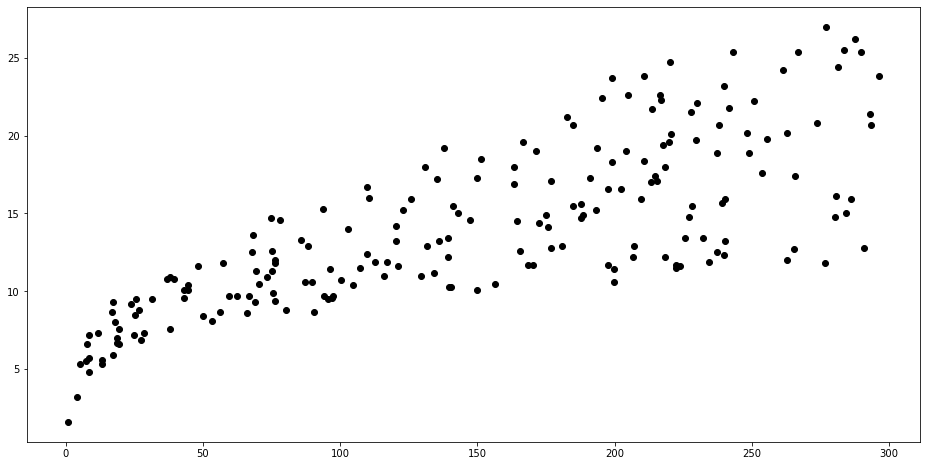

In [207]:
plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], data['Sales'], c='black')

From the graph we can see that there is a clear relationship between amount spent on Tv Ad and sales.

##### Generate linear Appreciation of this data

First we convert these variables into vectors using the reshape function and store them into 2 variables. 
(TV sales and Sales)

Then we use the fix functin of the linear regression function to fix the lines of x and y
Then call the fit function of x and y

In [247]:
X = data['TV'].values.reshape(-1, 1)
Y = data['Sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

##### Visualise the Best Fit Line

Lets visualize it using the scatter plot again

First, we predict all the values on the x dataset then we use these predictions to make a line on the scatter plot.

the dots  will be in black and the line will be in blue.

the xlabel will be money spent on TV ads and y label will be sales.

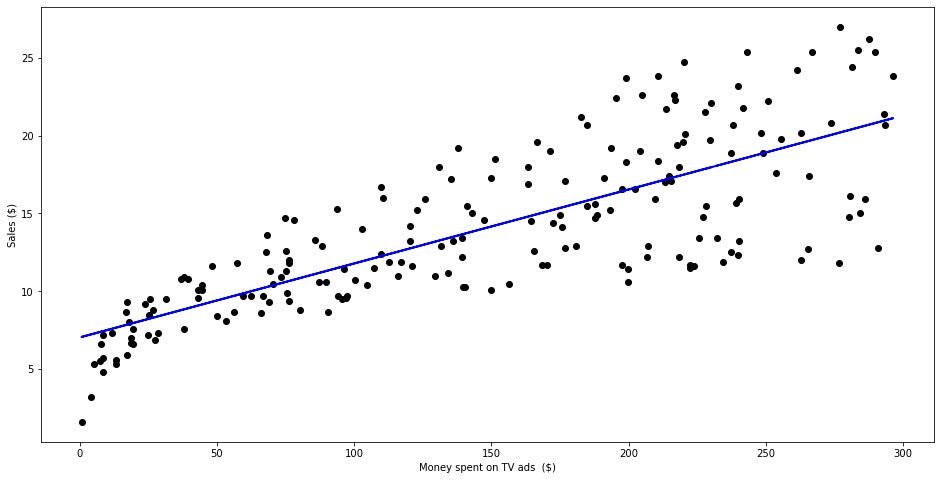

In [248]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.plot(
     data['TV'],
     predictions,
     c='blue',
     linewidth=2
) 
plt.xlabel("Money spent on TV ads  ($)")
plt.ylabel("Sales ($)")
plt.show()

From the graph it seems that a simple linear regression model can explain explain the general impact of amount spent on TV ads and sales.

This is how we implement linear regression model using the scikit learn library.

### Logistic Regression

#### Overview

. Classification techniques are are an essential part of machine learning and data mining applications.

Aproximately 70% of problems in data science are classification problems.

There are alot of classification problem that are available but Logistic regression is common and it is a useful regression method for solving the binary classification problem. 

.Logistic Regression can be used for various classification problems such as spam detection, Diabetics prediction, forecasting,wether the user will purchase or not, click on a given ad link or not etc

#### What is logistic Regression ?

Logistic regression is one of the most simple and commonly used Machine learning  algorithms for two-class classification.It is a statistical method to predict binary classes. 

It's basic fundamental concept is also used in deep learning.

It is a special case of linear regression and its target variable is categorical in nature.

It uses a log of odds as a dependent variable.

It predicts the probability of binary  even utilizing logistic function.

 We need to catagorize the data into different categories, and our job is to define the line that does it. 

#### Why is it called Logistic regression ?

This is due to classification mechanism

Contrary to popular belief, Logistic regression IS a regresion model

The model build a regression model to predict the probability that the given data entry belongs to the category number as 1.

Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the 'Sigmoid function'

Linear regression gives you a continuous output but logistic regression ,logistic regression provides a conscious ... output

An example of a continuous output is .....

An example of discrete output is predicting that a patient have cancer or not or predicting if a customer will click on an ad or not.

#### Applying sigmod function to the linear regression equation

y = β0 + β1X1 +  β2X2 +.... + βnXn  linear Reg.Eq.

P = 1/1 + e^-y        Sigmoid function

P = 1/1 + e^-(β0 + β1X1 +  β2X2 +.... + βnXn ) 

Applying sigmoid to linear reg

#### Sigmoid Function

The sigmoid  function, also called logistic function gives an 'S' shaped curve that can take any real-valued number and map it into a value between 0 and 1. 

f(x) = 1 / 1 + e ^ -(x)

If the curve goes to positive infinity, y predicted will be 1,
if the curve does to negative infinity, y predicted will becone zero.

If the output of the sigmoid function is more than 0.5 we can classify the outcome as yes or one and if it is less than 0.5 , we can clasify it as zero or No

For example ,if the output is 0.75 , we can say that there is a 75% chance that a patient will suffer from cancer

#### Cost Function

Just like we need a cost function for linear regression , we need one as well for logistic regression as well , which has to be used to obtain the best fit line.

The cost function used in linear regression won't work here. if you try to use the linear regression cost function to generate j(0) in a logistic regresion problem you would end up with a non-convex function a weirdly-shaped graph with no easy to find minimum global point. 

Hence, we have a differnt cost function for linear regression

h(x1) = g(β^Tx1) = 1 / 1 + e^β^Txi

Cost(h0(x),y)= { -log(h0(x))

if y = 1   
                -log(1-h0(x)) if y = 0
                
  J(β) =  Σ^n i=1 - y1log(h(x1)) -
  
  (1 - yi)log(1 - h(xi))  
  
  (final cost function)        

#### Gradient Descent

Gradient descent is a method of updating hyperparameters (beta) to reduce the cost function.

 In other words to minimize the cost function by running the gradent descent algorithm.

The procedure is identical with what we did for linear regression.

To minimise the cost function ,we have to run the gradient descent function on each parameter and that is how gradient descent works.

Repeat{
    
    βj : = βj - α ∑^n i=1 (h(xi) - yi)xij
    
    (Simultaneously updata all βj )
}

In the end we get the best parameter that can work with the hypothesis function to predict to whether a data point belongs to one class or the other.

#### Implementation

We have two choices, we have either use the scikit learn library to import logistic regression model and use it directly or we can write our own model based on the equations above.

Logistic regression is among the most commonly known code  machine learning algorithm out there.

It has many applications in businesses one of which is the pricing optimization.


We will be learning  how to code logistic regression in python using the scikit learn library to solve a big pricing problem

#### Recap

Logistic regression is a linear model that aims to explain the relationshipp between a dependent binary variable and one or more independent variables.

The output of logistic regression is a number between 0 and 1 ,which you can think of as being the probability that a given class is true or not.

The output is between 0 and 1 because the output is transformed by a function which usually the sigmoid function.

We will be doing the implementation with a very simple example.

We will be implementing a very basic logistic regression model using scikit learn without a trained test split on the data set and with mimimum data visualization.

Import all the dependencies

In [249]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

Define dataset

we have defined our own datatset

In [250]:
x = np.array([100,120,150,170,200,200,202,203,205,210,215,250,270,300,305,310])
y = np.array([1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0])

Plot the data

We need to visualize the data using matplotlib to gain a better understanding of what the input will be .....

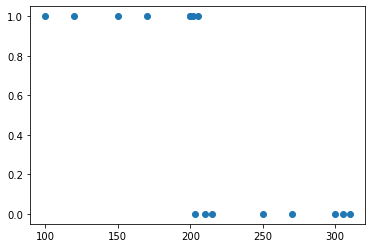

In [251]:
plt.scatter(x,y)

Lets add title to our graph

Text(0, 0.5, 'Staus (1:Won, 0:lost)')

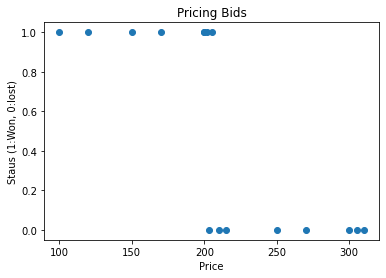

In [252]:
plt.scatter(x,y)
plt.title("Pricing Bids")
plt.xlabel("Price")
plt.ylabel("Staus (1:Won, 0:lost)")

From the graph each point above represents a bid that we have particpated in.

On the x axis , you can see the price that was offered and on the y axis you can see if you won the bid or not.

Our goal is to use logistic regression to come up with a model that generates the probability of loosing or winning the bid into a particular place.

In python logistic regression is made simple thanks to those scikit learn model.
Here we will be using logistic regression by the sk-learn linear model.


Initialize and run the model

Variable name logreg

regularization strength C = 1.0.

solver="1bfgs"  this is an optimization strength


for multi_class="ovr"
we specify all we have  because we are solving a binary class problem

In [253]:
logreg = LogisticRegression(C=1.0, solver="lbfgs", multi_class="ovr")
X = x.reshape(-1, 1)
logreg.fit(X,y)

LogisticRegression(multi_class='ovr')

In [111]:
logreg.params(x,y)

AttributeError: 'LogisticRegression' object has no attribute 'params'

The next step is to fit the logistic regression model by running the fit function....

Before we do that, we will transform our x array into a 2D array as required by the sk-learn model.

This is beacues we only have one feature which is the price.

If we have more than one feature, our array will already be 2D and there will not be a need to transform our x array.

So we eill use the resgape function to rehape our model 
then fit our model with logreg.fit (x,) to fit your model

#### Predict values

If we want to run the prediction on a specific price , we can also do that,

Lets say we want to find out if we lost or not when the price was 110,

we should be winning when is 110  but if the price is around 275 we should be loosing the bid.

In [216]:
print(logreg.predict([[110]]))

[1]


In [217]:
print(logreg.predict([[275]]))

[0]


### Support Vector Machine (SVM)

Support vector machine is on of the most popular and talked about machine learning algorithms

They were extremely popular during the 1990"s and continued to be a useful ..... method for high performing algorithm.

### Overview

. Support vector Machine (SVM) is a supervised machine learning algorithm which can be used for classification challenges.

. In addition to performing liner classification, SVMs can efficiently perform a non-linear Classification.

#### What are SVMs?

A Support Vector Machine (SVM) is a discriminative classifiier formally defined by a seperating hyperplane. In order words ,given labelled training data(supervised learning ), the algorithm outputs an optinal hyperplane which categorizes new examples.

#### Layman Terms

An SVM model is a representation of the examples of the seperate categories are divided by a clear gap that is as wide as possible.

#### What are SVMs?

. 1D Data- Support Vector Clasifier is a point.

. 2D Data - Support Vector Classifier is a line

. 3D Data - Support Vector Classifier is a plane

. 4D Data or more -nSupport Vector Classifier is a hyperplane

#### Hyperplane 

A hyperplane in an n-dimensional Euclidean space is a flat ,n-1 dimensional subset of that space that divides the space into two disconnected parts.

A line is a hyperplane or even a 2D plane for a 2D data is a hyperplane.

#### Kernels

SVM algorithms uses a set of mathematical functions that will define .....

Sometimes it is not possible to find a hyperplane or a linear decision boundary for some classification problems.If we project the data into a  higher dimension from from the original space. we may get a hyperplane in the projected dimension that helps to classify the data.


#### Kernels

Kernels helps to find a hyperplane in a higher dimensional space without increasing the computational cost much . Usually , the computational cost will increase,if the dimension of the data increases.

#### How a SVM Model Learns

The SVM model needs to be solved using an  optimization proceduere.

You can use a numerical optimization procedure to search for the coefficients of the hyperplane.

The most popular method for fitting SVM is the  'SMO'the sequential minimal Optimization method that is very effficient.

It breaks problems into sub problems that can be solved analytically by calculating  rather than numerically by searching or optimizing .

#### Implementation

We will be implementing the SVM (Support Vector Machine.

We have two choices .  We can either use the scikit learn library to import the SVM model and use it directly or we can write our own model from scratch 

A SVM is a type of supervised machine learning classification algorithm. it was used initially in the 1960's and later refined in the 1990's.

However, it is only now that they are becoming extremely popular owing to the ability to achieve brilliant result.

They are implemented in a unique way when compared with other machine learning algorithms.

We will be implementing SVM with the help of scikit-learn library.

For the implementation our task is to predict whether a bank's currency note is autentic or not based on four attributes of the note.

They are as folows :

The skewness of the performed image

The variance of the image 

The Entropy of the image

The Curtosis of the image

This is a binary classification problem and we will use SVM algorithm to solve this problem.

linear regression gives you continous output but logistic gives you discrete output

In Mathematics, a variable can be classified into two types, namely: discrete or continuous. If a variable can take on two or more distinct real values so that it can also take all real values between them (even values that are randomly close together). In this case, the variable is continuous in the given interval. If a variable will take a non-infinitesimal break on each side of it, and it does not contain any values, then it is discrete around that value. In some instances, a variable will hold discrete values in some areas of the number line and continuous in others areas..

##### Import all the dependemcies

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


We will use sklearn.metrices classification report to evaluate our data

In [257]:
bankdata = pd.read_csv("C:\\Users\\user\\Downloads\\bill_authentication.Csv")
bankdata

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


##### Exploratory Data Analysis

We will need to check the dimension of the data,and see the first euros.

To see the rows and columns of the data we will use the following command .

In [258]:
bankdata.shape

(1372, 5)

The output gives us (1372, 5), this means that our dataset have 1372 rows and 5 columns.

Lets look at the first 5 rows using the head command

In [259]:
bankdata.head

<bound method NDFrame.head of       Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

Here, we can see the first row of the dataset and that the dataset is numeric, the label is numeric ie class 1 or 0

##### Data Preprocessing

We will need to preprocess the data before training the model

First, we need to divide the data into attributes and labels

Second. we divide the data into Training and Testing set

Using the code below.

In [260]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In the first line of the discription of the cell, all the column of the bankdataframe are being stored in x except the class column which is the label column.

The drop method drops this column

The second line, only the class column is being scored in the y variable and at this point, x variable contains attribute while y variable contains corresponding labels.

Once the dataset is divided into attributes and labels.

Final preprocessing step is to divide the dta into training and test.

Luckily, the model selection library of the scikit learn library contains train test split method that allows us to seamlessly divide the data into training and test

#### Training the algorithm

After dividing our data into training and test, is now time to train our SCM on the training data.

Scikit learn contains SCM library which contains building classes for diffrent SCM algorithms.

Since, we are going to perform a clasification task, we will use the support vector classifier class which will return an SVC on the scikit learn SCM library.

This class takes one parameter which is the kernel type

In the case of a simple SCM we simply set this parameter as linear as simple SCM can only classify linearly discribable data.

Now, lets call up the data

The fit method or svc class is called trained  algorithm on the training data which is passed as a parameter to fit the model using the fit method.

In [263]:
svcclassifier = SVC(kernel='linear')
svcclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [264]:
svcclassifier.fit.params(X_train, y_train)

AttributeError: 'function' object has no attribute 'params'

#### Predicting Classess

To make predictions, the predict method of svc class is used.

We can see that  algorithm have been run on the X-_tset data and all the  predictions have taken the y_pred variable and we can see the prediction of each of the rows for x_test

In [121]:
y_pred = svcclassifier.predict(X_test)
print(y_pred)

[1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0]


#### Evaluate the model

To evaluate the algorithm, confusion matrix,Precision,Recall and F1score measures are the most commonly used matrix.

Scikit learn matirx library contains the classification report which can be used to find the value for these methods.

Now lets print the classification report

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       165
           1       0.99      1.00      1.00       110

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



From the above report, the most  important matric which we can see is the output of the accuracy of our algorithm which is0.99 ie 99%.

This is a very basic implementattion of svm using the scikit-learn library.

Now we can go ahead and implement the algorithm on different dataset.

### Random Forest

A big part of machine learning is classification.

We want to know the class an observation belongs to.

The ability to precisely classify observations is extremely valueable for various business obligations for example predicting whether a particular user is buying a product or not, whether a loan has to be given to a person or not.

#### Overview

. Random forest is a flexible, easy to use machine learning algorithm that produces even without hyper-parameter tuning, a great result most of the time.


. It is also one of the most used algorithms, because of its simplicity and diversity(it can be used for both classification and regression tasks)


#### Prerequisite

Before learning random forest, one must understand how 'Decision Trees' work.

. A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

#### What are Random forest?

#### Layman Terms

Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

Each individual tress in the random forest speaks of a class prediction and the class with the most worth becomes our models prediction

In the figure , six decision tree predicts 1s and  and three predicts 0s, hence, the final prediction of the classifier is 1.

#### Fundamental Concept

The fundamental concept behind random forest is a simple but powerful one-the wisdom of crowds.

A large number of relatively uncorrekated models (trees) operating as a committee will outperform any of the individual constituent models for individual decision trees.

This is the most fundamental concept in random forest.
The low correlation between models is the key.

The reason for this wonderful effect is that the tree ...connects each other from the individual error.

While some tress may be wrong many other tress may be right. So as a group of trees are able to move in the correct direction.

#### How it works

First, create a bootstrapped dataset by randomly selecting samples from the original dataset,*We can pick same sample more than once*


Then, create a decision tree using the booststrapped dataset, but only use a random subset of columns in each step.


Now, go back to step 1 and repeat

This reults in a wide variaty of trees.

The variety is what makes Random Forests more effective than individual decision trees.

#### How do we measure or ensure that the trees diversify each other?

Feature Randomness : Each tree in a random forest can pick only from a random subset of features.

In the numpy decision tree when it is time to split a node, it considers every possible feature and that produces this operation between the observation in the left node and those in thr right node.

In contrast, each tree in a random forest can pick only from a random subset of features, this causes even more variation among the trees in the model and ultimately results in lower correlation across the trees and more diversifications

Since, we are selecting random features in multi -decision trees , they ensure that this will diversify all the decision trees when combined together.

#### Implementation

We have two choices , we can either use the scikit learn library to import the random forest model and use it directly or we can write our own model from scratch.

We will be implementing random forest using the scikit learn model.

For the implementation our task is to predict whether a bank's currency note is autentic or not based on four attributes of the note.

They are as follows :

The skewness of the... performed image

The variance of the image

The Entropy of the image

The Curtosis of the image

This is a binary classification problem and we will use a random classifier to solve this problem.

#### Import the necessary dependencies.

For the scope of this lecture, we will import each library as the need arises

In [123]:
import pandas as pd
import numpy as np

In [124]:
dataset = pd.read_csv("C:\\Users\\user\\Downloads\\bill_authentication.Csv")


Lets get a high level view of the dataset using the command below

In [125]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


If you observe the values in the dataset are not well scaled ,

so we will need to scale the data before training it.

Declare the dataset into x and y variables ,which are attributes and the labels

In [126]:
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

for x we need all the values(0:4)
for y we just need the last index (:, 4) 
as this follows zero indexing , for x ,we just need  the first 3 coluns 0 - 3, which is variance , skewness and Entropy variables  and class in the y variable.

After this we have to divide the dataset into Training and Test split using the train test split model from sk-learn,

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state=0)

We dont need a random state so = 0

Lets apply some feature scaling on our data so that the data can be really scaled before we actually train it.

We need Standard scaler from the prepocesing model of sklearn

In [129]:
from sklearn.preprocessing import StandardScaler


In [130]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

After scaling, we can now use the random forest to solve the classification problem using the random forest classifier from the sklearn ensemble model.

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

The RandomForestclassifier takes the n_estimators as a parameter.

The parameter defines the number of tree we have in a random forest and we are using 20 trees here.

So for classification problems, the matric used to evaluate algorithm are accuracy, confusion matrix,Recall,precision  and flscore values.

Luckily, the scikit learn  library provides all these matrix

We will be using these matrix to see how good our model performs.
Form sklearn import classifiation report,confusion matrix,accuracy
Then print confusion matrix,(y_test,y_pred)
print classification-report(y_test,y_pred
then ,lastly, the accuracy_score

In [133]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [134]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[153   4]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       157
           1       0.97      1.00      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9854545454545455


From our result, our accuracy is 0.98 ie 98%, this is good enough.

This a very simple implemation of random forest using minimum data.

It is adviseable to practice more on real life datasets as it will help you understand how this works.

K-NN is for classifcation and k-means clustering is for clustering

### K- Means Clustering

#### Overview

. K-means clustering is one of the simplest and popular Unsupervised machine learning algorithms.

. There are a plethora of real-world applications of K-Means Clustering.

. The implememntation of K-Means is easy when compared to algorithms like SVMs etc

#### What is clustering?

Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

Lets consider an example

#### Unsupervised learning?

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labelled responses.

IN supervised learning , when we have a target variable to predict based on a given set of predictors or independent variables, such problems are called supervised learning problems.

They are usually yes /no which we usually translate to integers so that pyhton can understand it.

For example finding out if a loan will be approved or not.

In clustering, we do not have a target to predict.

We look at the data and then to club similar observations and from diferent groups.

Hence, it is an unsurpervised learning problem.

#### Applications of Clustering 

. We Will be looking at how this helps us in the real world.

. Customer Segmentation

Example the bank discussed above clustering based on their income.

. Document Clustering : 

Here you have multiple documents and you need to plot similar documents together, clustering helps us group these documents together and similar documents into thesame clusters.

. Image Segmentation:

Here we try to plug similar pixcels in the image together.We can apply clustering to create this clusters having similar pixcels in thesame group.

. Recommendation Engines:
Lets say you  want to watch some songs or recommend some to your friends.

You can use clustering to find similar songs and finally recommend those songs to the person.

#### K- Means Clustering

Our aim here is to minimize the distance between the points within a cluster.

There is an algorithm that tries to minimize the distance of the points in a cluster with their centroid - the k-means clustering technique.

#### Main objective 

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

#### How it works

Lets say we have eight points and we want to apply K-means clustering to create clusters.

.  .        .     .
.  ,     .    .

> Step 1  - Choose the number of clusters K

>Step 2 - Selct K random points from the data as centroids 
ie we randomly select the centroid for each cluster.

> Step 3: Assign all the points to the closest cluster centroid.

Ie the points closer to the red point are assigned to the red cluster and the points closer to the green point are assigned to the green cluster.


Step 4: Recompute the centoids of newly formed clusters.

Once we have assigned all the points , we wil now recompute the newly formed centoids.

Steps 5 : Repeat step 3 and 4

. .  Red colours         .  .
. .                    .  .    green                                    colors

#### When to stop K-means clustering?

Essentially there are three ways to stop K-means clustering.

. Centroids of newly formed clusters do not chande. It means it has an end and we can actually cluster our data.

. Points remain in the same cluster which means there may be other possible way to improve our clustering algorithm.

. Maximum number of iterations are reached.

So you can focus on the first two....

#### Implementation

We have two choices , we can either use the scikit learn library to import the random forest model and use it directly or we can write our own model from scratch.

Writing our own model from scratch is very easy

We will use scikit lern library to implement gaming.

#### Import the libraries

In [265]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#### Prepare the Data

In [266]:
X = np.array([[5,3],
    [10,15],
    [15,12], 
    [24,10],
    [30,45], 
    [85,70], 
    [71,80], 
    [60,78], 
    [55,52],
    [80,91], ])        
                                          

#### Visualize the data

To visualize the data,simply plot all the values of the first array against all the values of the second array

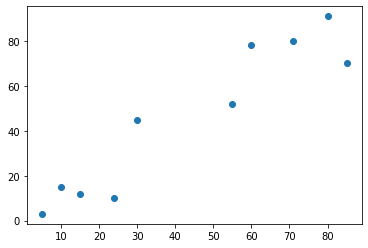

In [267]:
plt.scatter(X[:,0], X[:, 1], label='True Position')

#### Create Clusters

We have to form two clusters of the above data points.
We can make one cluster of 5 points on the buton left and one cluster of 5 points on the top right.
So you crete the KMeans cluster and fit it as shown below

We create a kmeans object and pass it hrough a number of clusters

In [268]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [139]:
MY RESULT DOES NOT SHOW EVERYTHING  IN THE VIDEO !!!!

SyntaxError: invalid syntax (Temp/ipykernel_14048/2856798490.py, line 1)

#### Explore the data

We have to call the fit method Kmeans and pass the data we want to cluster, which is the X data we created earlier. lets see the central values created.

We can see that it is a 2D array

To see the labels of data point, lets execute the following 

In [269]:
print(kmeans.cluster_centers_)

print(kmeans.labels_)

[[70.2 74.2]
 [16.8 17. ]]
[1 1 1 1 1 0 0 0 0 0]


We have cluster 0 and cluster 1. It point by point.
The output is a one dimensional array of 10 elements corresponding to the cluster assigned to our 10 data points.

Here, the first five points have been clustered together and the last 5 points have been clustered.

0  and 1 are used to represent the cluster ids and have no mathematical difference towards each other.

If there were three clusters , the third cluster would have been represented by division 2 ...

#### Visualize K-means with two Clusters

Lets plot the data points again and visualize how the data has been clustered.

This time we will plot the data along with the assigned label so as to distinguish between the clusters.

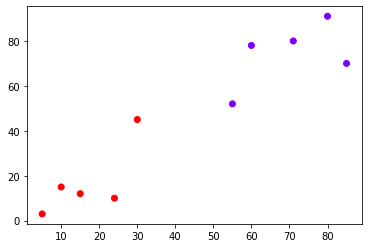

In [270]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')

We are passing kmeans label as the value for c parameters that corresponds to the labels.The c-map pararmeter is passed for choosing the differnt data for diferent data points.

In [142]:
GRAPH SCATTER PLOT POSITION DIFFENT FROM VIDEO!!!

SyntaxError: invalid syntax (Temp/ipykernel_14048/2161239472.py, line 1)

#### Try with 3 Clusters

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plt.scatter(X[:,0], X[:, 1], c=kmeans.labels_, cmap='rainbow')

#### Visualize with the clusters

Lets plot along with the central co ordinate of each cluster to see how the central position affects clustering.

We always use scatter plot in kmeans plot because it is easier to see.

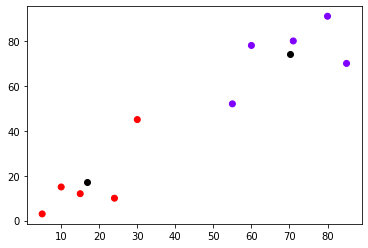

In [143]:
plt.scatter(X[:,0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

In the case of 3 clusters the two points in the middle as displayed with red and one displayed with black between the two reds.

As compared to buttom left and top right.

However , if there were two clusters, they wouldnt have ben a centroid in the center, hence the red points would have been clustered together with the button left or top right.

#### Overview 

. The K-nearest neighbors (KNN) algorithm is  a simple ,easy - to - implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

. A supervised machine learning algorithm is one that relies on labelled input data to learn a function that produces an appropriate output when given new unlabelled data.

#### K-Nearset Neighbors

The KNN aldorithm assumes that similar things exists in close proximity . In otherwords, similar things are near to each other.

In other words, birds of thesame feathers fluck together.

#### K-Nearest Neighbors

KNN captures the idea of similarity(Sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood - calculating the distance between points on a graph.

There are many ways to calculate distance and one way might be preferable depending on the problem you are trying to solve.

We are going to use a gridan distance which is a popular and familiar choice

#### K-NN Algorithm

. Load the data.

. Initialse K to your chosen number of neighbors.

. For each example in data.

    . Calculate the distance between the query example and current example from the data
    
    Note the distance here is the Euclaen distance
    
     .Add the distance and the index of the example to an ordered collection.
     
.  Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances.

. Pick the first K enteries from the sorted collection.

. Get the labels of the selected K enteries.
     
     
Now if you want to find the mean , that is a regression problem   and if you want to find the mode , it is a classification problem 
     

#### Choosing the right value for K

To select the K that's right for your data,we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm's ability to accurately make predictions when it's given data it hasn't seen before.

#### Advantages 

. The algorithm is simple and easy to implement.

. There's no need to build a model, tune several parameters, or make additional assumptions.

. The algorithm is versatile. It can be used for classification. regression and search(asw e will see in the next section)

#### Disadvantages 

. The algorithm gets significantly slower as the number of examples and/or preictors/independent variables increas.

#### Applications of K-NN

KNN can be useful in solving problems that have solutions that depend on identifying similar objects.
An example of this is using the KNN algorithm in recommender systems, an application of KNN-search

#### Application of K-NN

At scale, this would look like recommending products on Amazon, articles on Medium, movies on Neflix, or videos on youTube , Although, we can be certain they all use more efficient means of making recommendations due to the enormous volume of data they process.

#### Implementation

We have two choices , we can either use the scikit learn library to import the k-nn model and use it directly or we can write our own model from scratch

K-NN is a type of supervised learning algorthm, It is extremely easy to implement in most basic form yet perform most complex classification tasks.
It is a non parametric learning algorithm which means that it does not assume anything about genderadiator.

This is an extremely useful feature as most of the real world data does not really follow any theoritical assumptions  for example data linear skelebility... or uniform distribution.

We will be using the famour iris data set for our K-NN example.

It consists of four attributes  

i. Sepal length

ii. sepal width

iii petal length

1v. Petal width

Task: We are to predict the class to which this class belong to

In [144]:
We have three classes in the dataset

i. Iris Satosa

ii.iris Vescicla...

iii. irish verginica

SyntaxError: invalid syntax (Temp/ipykernel_14048/2268138598.py, line 1)

In [145]:
#### import the necessary libraries

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We have the url from which we can access the data.
we will now convert it to dataframe

In [147]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#Assign column names to the dataset
names = ['sepal=length', 'sepal=width', 'petal-length', 'petal-width', 'Class']

# Read dataset io pandas dataframe
dataset = pd.read_csv(url, names=names)

In [271]:
dataset.head()

,sepal=length,sepal=width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [149]:
#Split the datset into attribute and lebels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

The x variable habours the first 4 columns while the y independent variables habours the class which is the last column

In [150]:
# create train -test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_trian, y_test = train_test_split(X,y , test_size=0.2)

We need to scale the features so that all of them can be uniformly evaluated
We will have 120 records on train and 30 records on test

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [120, 1097]

The final step is to make variation on our test data

In [ ]:
y_pred = classifier.predict(X_test)

Now lets evaluate our algorithm. we will use confusion matrix from the sklearn metrics model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))


Scikit-Learn: Quiz

1. Scikit-learn is considered to be one of the libraries in python programming.


True

cikit-learn is an open source data analysis library, and the gold standard for Machine Learning (ML) in the Python ecosystem. Key concepts and features include: Algorithmic decision-making methods, including: Classification: identifying and categorizing data based on patterns.5 Aug 2022

2. What does Scikit-learn feature? (Choose all that apply)

classification
Regression
clustering

3. Scikit-learn can’t work with other libraries like NumPy and SciPy.

false

4. What is meant by Parsing CSV files with pandas library?

It is basic process of loading data from a CSV file into pandas DataFrame

5. Who uses Scikit-learn? (Choose all that apply)

Website makers

Software engineers

App Developers

#### Gradient Descent Step by Step

Gradient descent is decent at estimating parameters and StatQuest!

Note: this StatQuest assumes you already understand the basics of least squares and linearRegression .So if you re not already down with that ,check out the Quest..

Fitting a line to Data...

aka Linear Regression

aka least Squares


In statistics,machine learning and other Data Science fields, we optimize a lot of stuff.

When we fit a line with linear regression , we optimize the intercept and the slope

Height = intercept + slope * Weight

When we use logistic regression, we optimize a squiggle.

A Squiggle is a short line that curls and loops in an irregular way.

"some prescriptions are a series of meaningless squiggles"

A Squiggle is a software tool that automatically generates interactive web-based two-dimensional graphical representations of raw DNA sequences.


When we use t_SNE , we optimize clusters.

These are just a few examples of the stuff we optimize , there are tons more.

The cool thing is that Gradient Descent optimize all these things and much more

So if we learn how to optimize this line using Gradient Descent

Then we have learnt the strategy that optimizes this squiggle and these clusters.

and many more of the optimization problems we have in statistics, machine learning and Data Science.

#### What is optimization?

he action of making the best or most effective use of a situation or resource.
"companies interested in the optimization of the business"

Machine learning optimisation is the process of iteratively improving the accuracy of a machine learning model, lowering the degree of error. Machine learning models learn to generalise and make predictions about new live data based on insight learned from training data.

Lets start with a simple dataset

on the x-axis we have weight and on the y-axis we have height.

If we fit a line to the data and someone tells us that they weigh 1.5 

We can use the line to predict that they will be 1.9 tall!

So lets' learn how Gradient Descent can fit a line to to data by finding the optimal values for the intercept and the slope

Predicted Height = Intercept + slope * weight

We will start by using the gradient descent to find the Intercept 
Then once we understand how Gradient Descent works , we 'll use it to solve for the Intercept and the Slope.

For now lets just plug in the least squares estimate for the Slope.0.64

Then we will use Gradient Descent to find the optimal value for the Intercept.

The first thing we do is pick a random value for the intercept.

This is just an initial gues that gives Gradient Descent something to improve upon .

In this case we will use 0 .
but ant number will do.

And this gives us the equation for this line.

Predicted Height = Intercept (0)+ slope(0.64) * weight

In this example, we will evaluate how well this line fits the data with the Sum of the Squared Residuals.

Note: In machine learning lingo, the sum of the squared Residuals is a type of Loss Function.

We will learn more about loss function later.

 We will start by calculating this residual 
    
This data point represents a person with Weight 0.5 and height 1.4

We get the predicted height, the point on the line by plugging Weight = 0.5 into the equation for the line.


Predicted Height = 0 + 0.64 * 0.5 = 0.32


and the Predicted Height is 0.32

The residual is the differnce between the observed height and the Predicted Height.

Residual = Observed Height - Predicted Height 

Residual = 1.4 - 0.32 = 1.1

So we calculate the difference between 1.4 (the Observed Height) and 0.32 (The Predicted Height)

This gives us 1.1 for the residual.

Sum of squared residuals = 

1.1^2 (for the first residual + 0.4^2(the second residual) + 1.3^2 (third residual) 

= 3.1

sum of squared residuals = 1.1^2 + 0.4^2 + 1.3^2 = 3.1

We will keep track of the sum of the squared residuals up here.

Just for fun, we can plot that value on a graph.

The graph has the sum of squared residual on the y-axis and different values for the intercept on the x-axis

The red point on the graph represents the sum of the squared residuals when the intercept = 0

Howevre ,when the intercepts equals 0.25 then we would get another point on the graph

and if the intercept = 0.5 ,them we will notice that as the intercept changes the point changes.

For increasing values of the intercept , we get these points,


Of the points that we calculted for the graph , this one has the lowest sum of squared Residuals. ( point seen in the graph)

But is that the best we can do?

What if the best values for the intercept is somewhere between the assumed lowest sum of squared residual as can be seen in the graph.

A slow and painful method for finding the minimal sum of the Squared Residuals is to plug and chug  a bunch more values for the Intercept/

Dont despair! Gradient Descent is way more efficient.!

Gradeent Descent only does a few calculation far from the optimal solution and increases the number of calculations closer to the optimal value.

In other words , Gradient Descent identifies the optimal value by taking big steps when it is far away and baby steps when it is close.

Lets get back to using Gradient Descent to finf the optimal value for the intercept starting from a random value . In this case , the random value was 0.

When we calculated the Sum of squared Residuals, the first Residual was the difference between the Observed Height which was 1.4 and the Predited height which 
came from the equation for this line 


Sum of squared residuals=(1.4- 0.64'predicted height'* 'weight' 0.5)2

Predicted Height = intercept + 0.64 * weight

So we will replace predicted height with the equation for the line.

since the individual weighs 0.5 we will replace weight with 0.5

so for this individual, we can see the observed height and predicted height from the graph.

Note , we can now plug in any value for the intercept and get a new Predicted Height.

Now lets focus on the second datapoint

just like before, the residual is the difference between thr observed height which is 1.9 and the predicted height which comes from th equation for the line and since this individual weighs 2.3 we replace weight with 2.3

Sum of squared residuals = 1.4 - 

(intercept + 0.64 *0.5))2 + (1.9 - 

(intercept + 0.64 * 2.3 "weight"))2 + (3.2

= (intercept + 0.64 +2.9))2




Now let's focus on the last person

Again, the residual is the difference between the Observed Height which is 3.2 and the predicted height which comes from the equation from the line and since this person weighs 2.9 we will replace weiht with 2.9

Now we can easily plug in any value for the intercept and get the sum of the Squared Residuals

Thus, we now have an equation for this curve and we can take the derivative of the this function and determine the slpoe at any value for the intercept.

So lets take the derivative of the sum of the Squared Residuals with respect to the intercept.

Sum of squared residuals = (1.4- (intercept + 0.64 * 0.5))2

                           + (1.9-(intercept + 0.64 * 2.3))2
    
                           + (3.2 =(intercept + 0.64 * 2.9))2

the derivative of the sum of the squared residuals with respect to the intercept  is equal to the derivative of the first part.plus the derivative of the second part plus the derivative of the third part.


d / d intercept Sum of squared residuals = 

d / d intercept (1.4- (intercept + 0.64 * 0.5))2

+ d / d intercept (1.9- (intercept + 0.64 *2.3))2

+ d / d intercept (3.2- (intercept + 0.64 * 2.9))2

lets start by taking the derivative of the first part

d / d intercept (1.4- (intercept + 0.64 * 0.5))2 = 

first we move the derivative of the first part up to have room to work,

To take the derivative of this , we need to apply  " The chain Rule"

We start by moving the square to the front and multiply that by the derivative of the stuff inside the parantheses.

d / d intercept (1.4- (intercept + 0.64 * 0.5))2 =

= 2(1.4- (intercept + 0.64 * 0.5) *-1


d / d intercept 1.4 -(intercept + 0.64 *0.5)

d/ d intercept  + (-)intercept =-1


after removing the part we dont need , we will  simply by multiplying 2 by -1

= 2(1.4- (intercept + 0.64 * 0.5) *-1 

= -2(1.4- (intercept + 0.64 * 0.5))
         
and this |   is the derivative of the first part


d / d intercept Sum of squared residuals =

d / d intercept (1.4 - (intercept + 0.64 * 0.5))2


So we plug it in

d / d intercept Sum of squared residuals 

= -2(1.4 -(intercept + 0.64 * 0.5))


Now we need to take the derivative of the next two parts.

d / d intercept Sum of squared residuals  =

+ d / d intercept (1.9-(intercept + 0.64 * 2.3))2


 + d / d intercept (3.2-(intercept + 0.64 * 2.9))2

Exercise 

Find the derivatives of 2 and 3 

d / d intercept Sum of squared residuals  = 

-2 (1.4-(intercept + 0.64 * 0.5)

2(1.9-(intercept + 0.64 * 2.3))

+ -2(3.2-(intercept +0.64 * 2.9)  = -5.7

Lets move the derivative up here so that it's not taking up half of the screen

Now that we have the derivative, Gradient Descent will use it to find where the Sum of Squared Residuals is lowest.


Note, if we were using least Squares to solve for the optimal value for the intercept , we would simply find where the slope of the curve = 0

In constrast,Gradient Descent finds the minimum value by taking steps from an initial guess until it reaches the best value.

This makes Gradient Descent very useful when it is not possible to solve for where the derivatives = 0, and this is why Gradient Descent can be used in so many different situations.

Remember, we started by setting the Intercept to a random number in this case, that was 0. so we plot 0 into the derivatives and we got -5.7, so when the intercept = 0 the slope of the curve = -5.7

Note, the closer we get to the optimal value for the intercept , the closer the slope of the curve gets to 0, this means that when the slope of the curve is close to 0, then we should take baby steps, because we are close to the optimal value, and when the slope is  far from 0 , then we should take big steps . because we are far from the optimal value.

However, if we take a super huge step, then we would increase the Sum of Squared Residual!
So the size of the step should be related to the slope, since it tells us if we should take a baby step or a big step, but we need to make  sure the big step is not too big.

Gradient Descent determines the Stp size by multiplying the slope by  a small munber called 'The Learning Rate' we will take more on learning rate later.

Step size = -5.7 * 0.1 = -0.57

When the intercept = 0, the Step = -0.57

New intercept = <- With the step size , we can                        calculate a New Intercept.

The New intercept is the old intercept minus the step size
New intercept = old intercept - step size

we then plug in the numbers


New intercept = 0 -(-0.57)= 0.57

Step size = -5.7 * 0.1

In one big step, we moved much closer to the optimal value for the intercept.

Going back to the original data and the original line with the iintercept = 0.

We can see how much the residuals shrink when the intercept = 0.57,

Now lets take another step closer to the optimal value for the intercept.

To take another step ,we go back to the derivative and plug in the New Intercept (0.57) and that tells us that the slope of the curve is -2.3

d / d intercept Sum of squared residuals  = 

-2 (1.4-("intercept" 0.57 + 0.64 * 0.5)
    
2(1.9-("intercept" 0.57 + 0.64 * 2.3))
    
+ -2(3.2-("intercept" 0.57 +0.64 * 2.9)  = -2.3

Step Size = Slope * learning Rate

Step Size = -2.3 *0.1 = - 0.23

Now let's calculate the Step size by plugging in -2.3 for the slope and 0.1 for the Learning Rate.ultimately, the step size is -0.23 amd the new intercept = 0.8

New Intercept = 0.57 * (-0.23) - (-0.23) = 0.8

Now we can compare the residuals when the Intercept is = 0.57 to when the intercept = 0.8

Overall, the sum of squared residuals is getting smaller.

Notice, that the first step was relatively large compared to the second step.

Now let's calculate the derivate at the New Intercept(0.8) and we get -0.9

d / d intercept Sum of squared residuals  = 

-2 (1.4-("intercept" 0.8 + 0.64 * 0.5)
    
2(1.9-("intercept" 0.8 + 0.64 * 2.3))
    
+ -2(3.2-("intercept" 0.8+0.64 * 2.9)  = -0.9

Step Size = Slope * Learning Rate
           
           = -0.9 * 0.1 = -0.09


The step size  = -0.09  and the new intercept = 0.89

New Intercept = 0.8 - (-0.09) = 0.89

Now we increase the intercept from 0.8 to 0.89

then we take another step and the New intercept = 0.92

Then we take another step and the new intercept = 0.94

And then we take another step and the new intercept = 0.95

Notice how each step gets smaller and smaller the closer we get to the bottom of the curve.

After 6 steps , the Gradient Descent estimate for the Intercept is 0.95.

Note, The Least Squares estimate for the intercept is also 0.95.

So we know that Gradient Descent has done its job, but without comparing its solution to a gold standard, how does Gradient Descent know to stop taking steps?

Gradient Descent stops when the steps size is very close to 0.

Note . step Size - Slope * Learning Rate

The step size will be very close to - when the Slope is very close to 0.

Inpractice, the Minimum Step Size = 0.001 or smaller.

So if the slope = 0.009 then we will plig in 0.009 for the Slope and 0.1 for the Learning Rate and get 0.0009 ,which is smaller than 0,001, so Gradient Descent would stop.

Step Size - 'Slope' 0.009 * 'Learning Rate'0.1 = 0.0009

That said, Gradient Descent also includes a limit on the number of steps it will take before giving up.

In practice, the Maximum Number of Steps = 1,000 or greater.
So even if the steps size is karge, if there have been more than the Maximum Number of Steps  Gradient Descent will stop.

#### REVIEW

Lets review what we have learnt so far:
The firts thing we did is to decide to use the sum of the Squared Residuals as the loss Function to evaluate how well a line fits the data    

FORMULA : sum of sqaured residuals = (1.4-

Then we took the derivatives of the sum of the squared residuals in other words , we took the derivatives of the Loss Function

FORMULA : d / d intercept Sum of Squared Residuals =  -2(1.4-(intercept + 0.64 * 0.5)

Then we picked a random value for the Intercept, in this case we set the Intercept = 0

d/d intercept Sum of squared residuals = 
-2(1.4-(intercept + 0.64 * 0.5)

then we calculated the derivative when the Intercept = 0

Plugged that slpoe into the Step Size calculation

Step Size = Slope * Learning rate

Then calculated the New Intercept , the difference between the Old Inetrcept and the Step Size

New Intercept = Old Intercept - Step size

Lastly, we plugged the New Intercept into the derivative  and repeated everything until Step Size was close to 0

d/d intercept Sum of squared residuals = 

-2(1.4-(intercept + 0.64 * 0.5)

Now that we understand how Gradient Descent can estimate the Intercept, lets talk about how to estimate the Intercept and the Slope

Just like before ,we will use the Sum of the Squared Residuals as the Loss Function

Predicted Height = intercept + 0.64 * Weight

This is a 3-D graph of the Loss Function for different Values for the Intercept and the slope

we have the axis for the sum of squared residuals
We have the axis that represents different values for the Slope.

We have the axis that represents different values for the Intercept.

We want to find the values for the intercept and slpoe that give us the minimum Sum of the Squared Residuals.

d / d intercept Sum of squared residuals  = 

-2 (1.4-("intercept" 0.8 + 0.64 * 0.5)
    
2(1.9-("intercept" 0.8 + 0.64 * 2.3))
    
+ -2(3.2-("intercept" 0.8+0.64 * 2.9)  = -0.9

So, just like before , we need to take the derivative of this function and just like before , we take the derivative with respect to the Intercept.

d / d intercept Sum of squared residuals  =

but unlike before, we 'll also take the derivative with respect to the Slope!

We will start by taking the derivative with respect to the intercept

Just like before,we take the derivative of each part and just like before ,we ll use  The Chain Rule and move the square to the front

d / d intercept Sum of squared residuals  =

+ d / d intercept (1.9 -(intersept + slope *2.3))2  

d / d intercept Sum of squared residuals  =

+ d / d intercept (1.4 -(intersept + slope *0.5))2  

We will use The Chain Rule and move the square to the front and multiply that by the derivative of the stuff inside the parentheses.

d / d intercept (1.4 -(intercept + slope * 0.5))2 =

2(1.4- (intercept + slope * 0.5))* -1

= -2(1.4-(intercept +slope * 0.5))

We simplify by multiplying 2 by -1

Since, we are taking the derivative with respect to the Intercept,we treat the Slope like a constant and the derivative of the a constant is 0, so we end up with -1 just like before.

d / d intercept (1.4 -(intercept + slope * 0.5)
                 
d / d intercept (1.4 +(-1)intercept + slope * 0.5)

= -1               

Then we simplify by multiplying 2 by -1

d / d intercept (1.4 -(intercept + slope * 0.5))2 =

2(1.4- (intercept + slope * 0.5))* -1

= -2(1.4-(intercept +slope * 0.5))

We simplify by multiplying 2 by -1

This gives the derivative of the first part ,so we plug it in

d / d intercept Sum of Squared Residuals = 
d / d intercep(1.4 -(intercept + slope * 0.5))2 =

Likewise, we replace these terms with their derivatives

d / d intercept Sum of Squared Residuals = 

d / d intercept(1.9 -(intercept + slope * 2.3))2 =

and this whole thing is the derivative of the Sum of the Squared Residual with respect to the Intercept

d / d intercept Sum of Squared Residuals = 

-2(1.4 -(intercept + slope * 0.5))2

-2(1.9 -(intercept + slope * 2.3))2 

-2(3.2 -(intercept + slope * 2.9))2 

Now lets take the derivatives of the Sum of the Suqared Residuals with respect to the Slope.

d / d intercept Sum of Squared Residuals

Just like before ,we take the derivatives of each part

d / d intercept Sum of Squared Residuals =

- d / d sope (1.9-(intercept + slope * 2.3))2 

we take the derivative of each part

Sum of Squared Residuals = + (3.2 - (intercept + slope * 2.9))2

d / d intercept Sum of Squared Residuals =

 d / d slope (1.4-(intercept + slope * 0.5)2 


d / d slope (1.4-(intercept + slope * 0.5))2 = 
2(1.4- intercept + slope * 0.5))

and just like before ,we will use the chain rule to move the square to the front and multiply that by the derivative of the stuff inside the parebtheses.

d / d slope (1.4-(intercept + slope * 0.5)
             
 d / d slope 1.4 + (-1)intercept - slope * 0.5  = -0.5         

Since we are taking the derivatives with respect to the Slope ,we will treat the Intercept like a constant,and the derivative of a constant is 0, so we end up with -0.5

Then we simplify by moving the -0.5 to the front

d / d slope (1.4-(intercept + slope * 0.5))2 = 
2(1.4- (intercept + slope * 0.5))

Note: i left the 0.5 in bold instead of multiplying it by 2 to remind us that 0.5 is the weight for the first sample.

and  -2 * 0.5(1.4-(intercept + slope *0.5))

is the derivative of the first part

d / d slope Sum of Squared Residuals = 
d / d slope(1.4-(intercept + slope * 0.5))2  

so we piug it in

d / d slope Sum of Squared Residuals = 
-2*0.5(1.4-(intercept + slope * 0.5)) 

likewise, we replace these terms with their derivatives

d / d slope Sum of Squared Residuals =

+ -2 * 2.3(1.9-(intercept + slope * 2.3))2 

 + -2 * 2.9(3.2-(intercept + slope * 2.9))2 

Again,2.3 and 2.9 are in bold to remind us that they are the weights of the second and third samples.

Here is the derivative of the sum of squared residuals with respect to the Intercept

d / d slope Sum of Squared Residuals =

-2(1.4-(intercept + slope * 0.5) 

 + +-2(1.9-(intercept + slope * 2.3)

 + +-2(3.2-(intercept + slope * 2.9)

and here is the derivative with respect to the slope

d / d Slope intercept Sum of Squared Residuals = 

-2 *0.5(1.4 -(intercept + slope * 0.5))

  +-2*2.9(3.2 -(intercept + slope * 2.9))2 

  +-2 2.3((1.9-(intercept + slope * 2.3))2 

Note, when you have two or more derivatives of the same functiom, they are called a Gradient

We will use this Gradient Descent to descend to lowest point in the Loss Function. which in this case is the sum of the Squared Residuals.

thus , this is why the algorithm is called Gradient Descent!

Just like before, we will start by picking a random number for the Intercept in this case we ll set the Intercept = 0

and we pick a random number for the slope . In this case we ll set the slope = 1.

Thus, this line with intercept = 0 and Slope = 1 is where we will start.

Now lets plug in 0 for the Intercept and 1 for the Slope

d / d slope Sum of Squared Residuals =

-2(1.4-(0 + 1 * 0.5)

+-2(1.9-(0 + 1 * 2.3)

+-2(3.2-(0 + 1* 2.9) = -1.6
    
  Step Size(intercept) = Slope(-1.6) * Learning Rate(0.01)  

d / d Slope  Sum of Squared Residuals =

-2 *0.5(1.4 -(0 + 1 * 0.5))

+-2*2.9(3.2 -(0 + 1 * 2.9))2

+-2 2.3((1.9-(0 + 1 * 2.3))2 = -0.8
        
  Step Size(slpoe) = Slope (-0.8) * Learning Rate(0.01)        

And this gives us two slopes

Now we plug in the Slopes into the Step Size formulas and multiply by the learning rate,which this time we set at 0.01

NOTE: The larger learning Rate that we used in the first example doesn't work this time .Even after a bunch of steps .
Gradient Descent dosen't arrive at the correct answer. This means that Gradient Descent can be very sensitive to the Learning Rate,

The good news is that in practice , a reasonable Learning rate can be determined automatically by starting large and getting smaller with each step.

So in theory, you shoundn't have to worry too much about the Learning Rate.

Step size (intercept ) = -1.6 * 0.01 = -0.016

Step size (slope) = -0.8 * 0.01 = -0.008

Anyways , we do the math and get two Step sizes

Now , we calculate the New Intercept and the New Slope by plugging in the Old Intercept and the Old slope and the step sizes


New Slope = Old Slope - Step Size


New Slope = 1- (-0.008) = 1.008

And we end up with a New Intercept and a New Slope

this is the line we started with (Slope = 1 and Intercept - 0)

And this is the new line (with Slope = 1.008 and Intercept = 0.016) after the first step.

Now we just repeat what we did until all the Steps Sizes are very Small or we reach the Maximum Number of Steps

This is the best fitting line , with intercept = 0.95 and Slope = 0.64, the same values we get from Least Squares.

we now know how Gradient Descent optimize two parameters, the Slope and Intercept.

If we had more parameters , that we'd just take more derivatives and everything else stays the same.

NOTE: The sum of Squared Residuals is just one type of Loss function.

However, there are tons of other Loss Functions that work with otther types of data.

Regardless of which Loss function you use, Gradient Descent works the same way.

Step 1: Take the derivative of the Loss Function for each parameter in it. in fancy machine learning lingo, take the Gradient of the loss Function.

Step 2: Pick random values for the parameters

Step 3 : plug the parameter values into the derivatives (The Gradient)

Step 4: Calculate the Step Sizes: Step Size = Slope * Learning Rate.

Step 5 : Calculate the New Parameters :

New parameter = Old Parameter - step Size

Now go back to step 3 and repeat until Step size is very small , or you reach the Maximum Number of Steps

One last thing before we 're done 

In our example , we only had three data points , so the math didn.t take very long  but when you have millions of data points ,it can take a long time.

So there is a thing called Stochastic Gradient Descent that uses a randomly selected subset of the data of every step rather than the ful dataset.

This reduces the time spent calculating the dervatives of the Loss Function

Stochastic Gradient Descent sounds fancy , but it's no big deal.

Gradient Descent: Quiz

1. Gradient Descent is an optimisation problem. True

Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks. Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates.

2. Gradient Descent can only be used for Regression Problems. false

3. Learning rate is an hyper parameter in Gradient Descent used to update the parameters in the optimisation problem.

In [ ]:
ANS: true

Deep learning neural networks are trained using the stochastic gradient descent optimization algorithm. The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.

4. Which of the following is not the a variant of Gradient Descent. 

There are three types of gradient descent learning algorithms: batch gradient descent, stochastic gradient descent and mini-batch gradient descent.

5. Gradient Descent is a supervised Machine Learning Technique ?  Yes